In [1]:
import pandas as pd
import numpy as np
from PIL import Image
from mplsoccer import PyPizza, add_image, FontManager
import urllib.request

In [2]:
# Display the current settings
print("Current maximum number of rows: ", pd.get_option('display.max_rows'))
print("Current maximum number of columns: ", pd.get_option('display.max_columns'))

# Set new maximum number of rows and columns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

# Display the updated settings
print("Updated maximum number of rows: ", pd.get_option('display.max_rows'))
print("Updated maximum number of columns: ", pd.get_option('display.max_columns'))

Current maximum number of rows:  60
Current maximum number of columns:  20
Updated maximum number of rows:  500
Updated maximum number of columns:  500


In [3]:
final_player = pd.read_csv('../final_players_2024.csv')
player_2024=pd.read_csv('../Full_Players_2024.csv')
player_2023=pd.read_csv('../Full_Players_2023.csv')
player_2022=pd.read_csv('../Full_Players_2022.csv')
player_2021=pd.read_csv('../Full_Players_2021.csv')
newbie=pd.read_csv('../newbie_players_2024.csv')
# Fill missing values with 0 in place
final_player.fillna(0, inplace=True)
newbie.fillna(0,inplace=True)
player_2024.fillna(0,inplace=True)
player_2023.fillna(0, inplace=True)
player_2022.fillna(0, inplace=True)
player_2021.fillna(0, inplace=True)
final_player

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Tackles_per_90,Tackles_Def_3rd_per_90,Tackles_Mid_3rd_per_90,Tackles_Att_3rd_per_90,Dribblers_Tackled_per_90,Dribblers_Challenged_per_90,Dribblers_Tackle_Lost_per_90,Blocks_per_90,Shots_Blocked_per_90,Tackles+Interceptions_per_90,Clearances_per_90,Errors_Shots_per_90,Dribblers_Tackle_W%,Seasons at top 5,Seasons in PL,Seasons in Liga,Seasons in Serie A,Seasons in Ligue 1,Seasons in Bundesliga
0,0,Maximilian Arnold,de GER,MF,Wolfsburg,de Bundesliga,0.0,1994.0,126.0,123.0,10852,120.5,0.11,0.22,0.09,0.19,0.08,0.23,0.05,0.20,61.0,44.0,72.13,12.0,19.67,65.36,3.26,14.75,38.68,12.59,0.27,65.32,0.51,0.36,0.10,33.24,149.70,70.52,0.80,0.87,0.05,0.81,0.65,38.10,0.79,3.14,0.24,1.59,1.24,0.05,0.10,0.14,1.59,0.11,0.07,0.01,0.02,0.03,0.00,5330.0,6757.0,78.88,110348.0,37219.0,1831.0,2054.0,88.98,2483.0,2835.0,87.58,933.0,1623.0,57.49,0.01,0.15,0.18,-0.05,1.64,4.61,0.84,0.22,5.35,56.08,47.60,8.14,4.56,0.15,0.90,4.86,0.23,2.92,1.76,0.89,0.02,44.23,0.33,0.56,0.00,0.45,0.00,7.67,0.00,3.9,4.9,50.59,0.20,0.01,0.00,1.29,1.90,0.01,1.13,0.95,0.00,0.02,7.32,0.96,0.95,1.63,0.66,0.81,0.17,0.78,1.74,0.96,1.03,0.27,2.76,1.97,0.02,44.35,4,0,0,0,0,4
1,1,Nathaniel Clyne,eng ENG,DF,Crystal Palace,eng Premier League,0.0,1991.0,70.0,61.0,5474,60.8,0.00,0.03,0.00,0.03,0.01,0.04,0.01,0.04,40.0,21.0,52.50,15.0,37.50,52.93,2.60,18.47,24.89,9.85,0.28,52.93,0.66,0.34,0.24,24.21,108.88,52.86,0.92,0.68,0.03,0.71,0.15,28.78,1.51,0.76,0.07,0.62,0.06,0.00,0.03,0.01,0.62,0.05,0.00,0.00,0.02,0.00,0.00,2158.0,2752.0,78.42,32659.0,13140.0,1185.0,1318.0,89.98,844.0,1053.0,80.15,93.0,245.0,37.96,0.00,0.03,0.02,0.01,0.33,2.17,0.49,0.24,2.68,45.26,36.84,8.27,0.39,0.02,0.08,1.15,7.88,0.00,0.00,0.00,0.00,35.49,0.15,1.08,0.00,0.05,0.00,0.00,0.00,-0.5,-0.5,42.82,0.10,0.00,0.00,0.38,0.30,0.00,1.02,0.84,0.00,0.00,4.28,0.54,0.71,1.46,0.71,0.61,0.15,0.77,1.31,0.54,0.89,0

In [4]:
# Filter player_2023
player_2024 = player_2024.loc[player_2024['Min'] >= 900]

# Filter player_2023
player_2023 = player_2023.loc[player_2023['Min'] >= 900]

# Filter player_2022
player_2022 = player_2022.loc[player_2022['Min'] >= 900]

# Filter player_2021
player_2021 = player_2021.loc[player_2021['Min'] >= 900]

player_2024

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Tackles_per_90,Tackles_Def_3rd_per_90,Tackles_Mid_3rd_per_90,Tackles_Att_3rd_per_90,Dribblers_Tackled_per_90,Dribblers_Challenged_per_90,Dribblers_Tackle_Lost_per_90,Blocks_per_90,Shots_Blocked_per_90,Tackles+Interceptions_per_90,Clearances_per_90,Errors_Shots_per_90,Dribblers_Tackle_W%
0,0,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,0.0,2000.0,20,13,1237,13.7,0.00,0.07,0.00,0.07,0.00,0.06,0.00,0.06,34.0,14.0,41.2,12.0,35.3,51.90,3.14,18.39,22.12,12.04,0.80,51.90,2.48,1.02,0.88,26.57,158.69,81.82,1.61,0.88,0.51,0.95,0.58,27.08,1.90,1.68,0.15,1.17,0.29,0.00,0.00,0.22,0.00,0.15,0.00,0.00,0.00,0.00,0.00,450.0,581.0,77.5,7402.0,2789.0,220.0,248.0,88.7,188.0,235.0,80.0,34.0,63.0,54.0,0.07,0.06,0.07,0.01,0.51,1.82,0.95,0.15,3.14,42.41,33.07,9.27,0.80,0.15,0.22,0.95,8.47,0.00,0.00,0.00,0.00,32.85,0.07,1.68,0.15,0.00,0.00,0.00,0.02,0.0,0.0,31.3,0.07,0.00,0.00,0.88,1.90,0.15,0.58,1.39,0.00,0.07,5.47,0.36,0.80,2.12,1.46,0.51,0.15,1.46,2.48,1.02,0.66,0.36,2.70,1.97,0.00,58.8
1,1,Brenden Aaronson,us USA,"MF,FW",Union Berlin,de Bundesliga,0.0,2000.0,30,14,1267,14.1,0.14,0.28,0.14,0.28,0.14,0.27,0.14,0.27,77.0,34.0,44.2,41.0,53.2,47.87,0.78,7.66,21.35,20.78,3.33,47.87,5.46,2.41,2.91,28.79,192.98,98.37,2.62,2.06,0.64,2.91,2.70,32.41,6.45,3.76,0.57,2.91,0.07,0.57,0.21,0.00,0.00,0.43,0.00,0.14,0.00,0.00,0.00,365.0,472.0,77.3,4890.0,1506.0,206.0,240.0,85.8,105.0,130.0,80.8,19.0,32.0,59.4,0.14,0.13,0.14,0.01,1.56,2.13,0.99,0.21,3.97,33.48,31.13,2.06,0.21,0.35,0.07,1.56,0.85,0.43,0.14,0.21,0.00,25.89,0.28,1.49,1.28,0.50,0.11,0.29,0.11,0.0,0.0,44.8,0.21,0.07,0.07,1.06,1.77,0.35,0.14,1.28,0.00,0.00,6.24,0.92,1.13,2.27,0.92,0.92,0.43,1.13,2.27,1.13,1.84,0.07,2.41,0.28,0.00,50.0
2,4,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,0.0,1987.0,31,31,2781,30.9,0.13,0.13,0.10,0.10,0.11,0.12,0.09,0.09,15.0,8.0,53.3,7.0,46.7,70.71,9.

In [5]:
# Assuming 'final_player' is the DataFrame containing player data

# Filter out forwards (DF) and midfielders (MF) from the 'final_player' DataFrame
defender_players = final_player[final_player['Pos'].isin(['DF', 'DF,MF'])]
newbie = newbie[newbie['Pos'].isin(['DF', 'DF,MF'])]
player_2021 = player_2021[player_2021['Pos'].isin(['DF', 'DF,MF'])]
player_2022 = player_2022[player_2022['Pos'].isin(['DF', 'DF,MF'])]
player_2023 = player_2023[player_2023['Pos'].isin(['DF', 'DF,MF','DF,FW'])]
player_2024 = player_2024[player_2024['Pos'].isin(['DF', 'DF,MF','DF,FW'])]

# Reset the index if needed
defender_players = defender_players.reset_index(drop=True)
newbie = newbie.reset_index(drop=True)
player_2023 = player_2023.reset_index(drop=True)
player_2022 = player_2022.reset_index(drop=True)
player_2021 = player_2021.reset_index(drop=True)


In [6]:
Cancelo=defender_players[defender_players['Player']=='João Cancelo']
Cancelo

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Tackles_per_90,Tackles_Def_3rd_per_90,Tackles_Mid_3rd_per_90,Tackles_Att_3rd_per_90,Dribblers_Tackled_per_90,Dribblers_Challenged_per_90,Dribblers_Tackle_Lost_per_90,Blocks_per_90,Shots_Blocked_per_90,Tackles+Interceptions_per_90,Clearances_per_90,Errors_Shots_per_90,Dribblers_Tackle_W%,Seasons at top 5,Seasons in PL,Seasons in Liga,Seasons in Serie A,Seasons in Ligue 1,Seasons in Bundesliga
231,545,João Cancelo,pt POR,DF,Barcelona+Manchester City+Bayern Munich+Manche...,es La Liga+eng Premier League+de Bundesliga+en...,0.0,1994.0,128.0,119.0,10315,114.6,0.07,0.24,0.07,0.24,0.08,0.26,0.08,0.26,424.0,229.0,54.01,171.0,40.33,94.0,2.34,17.3,47.4,30.12,2.84,94.0,3.7,2.0,1.49,57.67,297.82,157.3,3.79,2.84,1.21,1.52,0.81,66.62,7.22,10.76,2.05,2.56,0.05,0.25,0.2,0.06,2.56,0.36,0.02,0.05,0.03,0.01,0.0,7906.0,9426.0,83.87,124804.0,39248.0,5053.0,5439.0,92.89,2695.0,3227.0,83.51,569.0,919.0,61.92,0.08,0.17,0.2,-0.0,1.23,6.18,2.25,0.4,7.54,82.25,73.09,8.9,1.47,0.33,0.9,3.12,7.43,0.01,0.01,0.0,0.0,68.99,0.26,1.39,0.0,1.14,0.0,1.68,0.0,-0.7,-0.7,54.63,0.22,0.02,0.0,1.16,0.9,0.13,1.42,1.52,0.0,0.02,6.18,1.34,1.1,2.33,1.18,0.82,0.33,1.34,2.43,1.09,0.91,0.12,3.75,1.46,0.05,55.87,4,3,1,0,0,1


In [7]:
Cancelo_2024=player_2024[player_2024['Player']=='João Cancelo']
Cancelo_2024

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Tackles_per_90,Tackles_Def_3rd_per_90,Tackles_Mid_3rd_per_90,Tackles_Att_3rd_per_90,Dribblers_Tackled_per_90,Dribblers_Challenged_per_90,Dribblers_Tackle_Lost_per_90,Blocks_per_90,Shots_Blocked_per_90,Tackles+Interceptions_per_90,Clearances_per_90,Errors_Shots_per_90,Dribblers_Tackle_W%
222,445,João Cancelo,pt POR,DF,Barcelona,es La Liga,0.0,1994.0,32,29,2503,27.8,0.07,0.22,0.07,0.22,0.06,0.28,0.06,0.28,111.0,61.0,55.0,38.0,34.2,79.35,3.02,16.26,39.93,24.1,2.55,79.35,3.99,2.19,1.37,44.96,263.2,140.86,3.81,2.09,1.4,1.98,0.9,52.84,6.94,2.84,0.29,2.52,0.04,0.22,0.0,0.04,0.04,0.25,0.0,0.04,0.0,0.0,0.0,1533.0,1852.0,82.8,24552.0,6589.0,854.0,924.0,92.4,537.0,648.0,82.9,114.0,183.0,62.3,0.14,0.22,0.24,-0.08,1.26,4.42,1.33,0.4,5.07,66.62,57.63,8.56,1.33,0.22,0.86,2.95,7.23,0.0,0.0,0.0,0.0,55.14,0.43,1.51,1.15,0.32,0.06,0.22,0.05,0.4,0.4,51.1,0.25,0.0,0.0,1.44,0.94,0.14,1.04,1.58,0.0,0.0,5.94,0.86,0.83,2.3,1.26,0.76,0.29,1.37,2.09,0.72,1.26,0.22,3.35,2.12,0.04,65.5


In [8]:
Cancelo_2023=player_2023[player_2023['Player']=='João Cancelo']
Cancelo_2023

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Tackles_per_90,Tackles_Def_3rd_per_90,Tackles_Mid_3rd_per_90,Tackles_Att_3rd_per_90,Dribblers_Tackled_per_90,Dribblers_Challenged_per_90,Dribblers_Tackle_Lost_per_90,Blocks_per_90,Shots_Blocked_per_90,Tackles+Interceptions_per_90,Clearances_per_90,Errors_Shots_per_90,Dribblers_Tackle_W%
615,17,João Cancelo,pt POR,"DF,FW",Manchester City+Bayern Munich,eng Premier League+de Bundesliga,28,1994,32,27,2286,25.4,0.12,0.31,0.12,0.31,0.06,0.27,0.06,0.27,126.0,65.0,52.0,49.0,38.0,93.58,2.01,17.68,46.93,29.8,3.35,93.58,4.96,2.56,1.93,58.11,340.63,191.81,4.88,2.52,1.57,1.5,0.91,67.76,8.46,37.23622,7.76378,2.4,0.0,0.12,0.24,0.12,0.04,0.55,0.0,0.08,0.0,0.0,0.0,1749.0,2081.0,84.0,28179.0,7419.0,979.0,1051.0,93.0,617.0,738.0,84.0,130.0,210.0,62.0,0.2,0.13,0.17,0.07,0.98,5.31,2.24,0.59,6.57,81.93,73.74,8.07,1.26,0.2,1.02,3.15,6.81,0.0,0.0,0.0,0.0,68.86,0.12,1.26,14.795276,3.440945,0.1,0.43,0.05,1.5,1.5,65.0,0.24,0.04,0.0,0.91,1.3,0.28,1.34,1.38,0.0,0.08,6.46,1.69,0.91,2.05,0.98,0.75,0.31,1.06,1.85,0.79,0.83,0.12,3.39,1.22,0.04,57.0


In [9]:
Cancelo_2022=player_2022[player_2022['Player']=='João Cancelo']
Cancelo_2022

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Tackles_per_90,Tackles_Def_3rd_per_90,Tackles_Mid_3rd_per_90,Tackles_Att_3rd_per_90,Dribblers_Tackled_per_90,Dribblers_Challenged_per_90,Dribblers_Tackle_Lost_per_90,Blocks_per_90,Shots_Blocked_per_90,Tackles+Interceptions_per_90,Clearances_per_90,Errors_Shots_per_90,Dribblers_Tackle_W%
95,446,João Cancelo,pt POR,DF,Manchester City,eng Premier League,27,1994,36,36,3227,35.9,0.03,0.22,0.03,0.22,0.11,0.26,0.11,0.26,106.0,56.0,52.8,50.0,47.2,104.99,1.87,17.21,53.79,34.68,2.81,104.99,2.95,1.56,1.39,67.16,315.13,161.14,3.48,3.59,1.0,1.25,0.67,76.57,7.52,3.51,0.5,2.73,0.03,0.22,0.45,0.06,0.03,0.36,0.03,0.03,0.08,0.0,0.0,2809.0,3365.0,83.5,44538.0,12620.0,1610.0,1732.0,93.0,938.0,1130.0,83.0,208.0,346.0,60.1,0.0,0.15,0.18,0.04,1.09,8.58,2.67,0.33,9.94,93.73,84.09,9.42,1.53,0.58,1.14,3.45,7.86,0.03,0.03,0.0,0.0,78.25,0.22,1.64,2.26,0.64,0.01,0.04,0.05,-3.0,-3.0,52.8,0.19,0.0,0.0,0.95,0.72,0.06,1.64,1.5,0.0,0.0,6.04,1.59,1.42,2.31,0.92,0.97,0.42,1.28,2.53,1.25,0.7,0.08,3.96,1.25,0.03,50.5


In [10]:
Cancelo_2021=player_2021[player_2021['Player']=='João Cancelo']
Cancelo_2021

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Tackles_per_90,Tackles_Def_3rd_per_90,Tackles_Mid_3rd_per_90,Tackles_Att_3rd_per_90,Dribblers_Tackled_per_90,Dribblers_Challenged_per_90,Dribblers_Tackle_Lost_per_90,Blocks_per_90,Shots_Blocked_per_90,Tackles+Interceptions_per_90,Clearances_per_90,Errors_Shots_per_90,Dribblers_Tackle_W%
101,432.0,João Cancelo,pt POR,"DF,MF",Manchester City,eng Premier League,26.0,1994.0,28.0,27.0,2299,25.5,0.08,0.2,0.08,0.2,0.06,0.24,0.06,0.24,81.0,47.0,58.0,34.0,42.0,94.94,2.59,18.2,47.02,30.59,2.67,94.94,3.18,1.84,1.33,57.73,268.55,135.45,3.14,2.9,0.94,1.41,0.82,66.51,5.88,3.21,0.47,2.51,0.16,0.47,0.04,0.04,0.0,0.31,0.04,0.04,0.04,0.04,0.0,1815.0,2128.0,85.3,27535.0,7458.0,1038.0,1117.0,92.9,603.0,711.0,84.8,117.0,180.0,65.0,0.0,0.18,0.22,-0.06,1.65,5.57,2.67,0.31,7.84,83.45,73.8,9.37,1.73,0.24,0.47,2.82,7.65,0.0,0.0,0.0,0.0,71.18,0.27,1.06,1.37,0.43,0.06,0.18,0.05,0.4,0.4,50.8,0.2,0.04,0.0,1.41,0.71,0.08,1.61,1.61,0.0,0.0,6.35,1.18,1.14,2.67,1.65,0.75,0.27,1.69,3.25,1.57,0.9,0.08,4.27,1.29,0.08,51.8


In [11]:
import pandas as pd





params=['Goals_per90', 'G+A_per90', 'G-PK_per90', 'G+A-PK_per90', 'xG_per90', 'xG+xAG_per90', 'npxG_per90',
        'npxG+xAG_per90', 'Take_Ons_Attempted', 'Take_Ons_Succ', 'Take_Ons_Succ%', 'Tackled_Take_Ons', 
        'Tackled_Take_Ons%', 'Touches_per_90', 'Touches_Def_Pen_per_90', 'Touches_Def_3rd_per_90', 
        'Touches_Mid_3rd_per_90', 'Touches_Att_3rd_per_90', 'Touches_Att_Pen_per_90', 'Tocuhes_Live_Balls_per_90',
        'Take_Ons_Attempted_per_90', 'Take_Ons_Succ_per_90', 'Tackled_Take_Ons_per_90', 'Carries_per_90', 
        'Total_Distance_per_90', 'Progressive_Distance_Carried_per_90', 'Progressive_Carries_per_90', 
        '1/3_Carries_per_90', 'Carries_Penalty_Area_per_90', 'Miscontrols_per_90', 'Dispossessed_per_90', 
        'Passes_Received_per_90', 'Progressive_Passes_Received_per_90', 'Shot_Creating_Action_per90', 
        'Goal_Creating_Action_90', 'Pass_Live_Shot_per_90', 'Pass_Dead_Shot_per_90', 'Take_Ons_Shot_per_90', 
        'Shot-Shot_per_90', 'Fouls_drawn_Shot_per_90', 'Defensive_Shot_per_90', 'Pass_Live_Goal_per_90',
        'Pass_Dead_Goal_per_90', 'Take_Ons_Goal_per_90', 'Shot_Goal_per_90', 'Fouls_Drawn_Goal_per_90', 
        'Defensive_Goal_per_90', 'Passes_Total_Cmp', 'Passes_Total_Att', 'Passes_Total_Cmp%', 'Passes_TotDist', 
        'Passes_PrgDist', 'Passes_Short_Cmp', 'Passes_Short_Att', 'Passes_Short_Cmp%', 'Passes_Medium_Cmp', 
        'Passes_Medium_Att', 'Passes_Medium_Cmp%', 'Passes_Long_Cmp', 'Passes_Long_Att', 'Passes_Long_Cmp%', 
        'Assists_per_90', 'xAG_per_90', 'xA_per_90', 'A-xAG_per_90', 'Key_Passes_per_90', 'Passes_1/3_per_90', 
        'Passes_Penalty_Area_per_90', 'Crosses_Penalty_Area_per_90', 'Progressive_Passes_per_90', 
        'Passes_Attempted_per_90', 'Live_Ball_Passes_per_90', 'Dead_Ball_Passes_per_90', 'Free_Kick_Passes_per_90',
        'Through_Balls_per_90', 'Switches_per_90', 'Crosses_per_90', 'Throw_Ins_Taken_per_90', 
        'Corner_Kicks_per_90', 'In_Corner_Kicks_per_90', 'Out_Corner_Kicks_per_90', 'Str_Corner_Kicks_per_90',
        'Passes_Cmp_per_90', 'Passes_Off_per_90', 'Passes_Blocked_per_90', 'Shots_total_per90', 
        'Shots_on_target_per90', 'Goals_per_shot', 'Goals_per_shot_on_target', 'Npxg_per_shot', 'Xg_net', 
        'Npxg_net', 'Percentage_of_Aerials_Won', 'Yellow_Cards_per_90', 'Red_Cards_per_90', 
        'Second_Yellow_Card_per_90', 'Fouls_Committed_per_90', 'Fouls_Drawn_per_90', 'Offsides_per_90', 
        'Interceptions_per_90', 'Tackles_Won_per_90', 'Penalty_Kicks_Won_per_90', 'Penalty_Kicks_Conceded_per_90',
        'Ball_Recoveries_per_90', 'Aerials_Won_per_90', 'Aerials_Lost_per_90']



# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_percentile_ranks = defender_players[params].rank(pct=True) * 100

# Get the row of Harry Kane's stats from the percentile ranks DataFrame
cancelo_percentile_ranks = round(players_percentile_ranks.iloc[[231]],0)

# Print the percentile ranks for Declan Rice
print(cancelo_percentile_ranks)


     Goals_per90  G+A_per90  G-PK_per90  G+A-PK_per90  xG_per90  xG+xAG_per90  \
231         72.0       91.0        73.0          91.0      83.0          96.0   

     npxG_per90  npxG+xAG_per90  Take_Ons_Attempted  Take_Ons_Succ  \
231        84.0            96.0               100.0          100.0   

     Take_Ons_Succ%  Tackled_Take_Ons  Tackled_Take_Ons%  Touches_per_90  \
231            51.0             100.0               58.0            98.0   

     Touches_Def_Pen_per_90  Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  \
231                     7.0                    19.0                    96.0   

     Touches_Att_3rd_per_90  Touches_Att_Pen_per_90  \
231                   100.0                    97.0   

     Tocuhes_Live_Balls_per_90  Take_Ons_Attempted_per_90  \
231                       98.0                       98.0   

     Take_Ons_Succ_per_90  Tackled_Take_Ons_per_90  Carries_per_90  \
231                  98.0                     97.0            96.0   

     Tota

In [12]:
import pandas as pd





params=['Goals_per90', 'G+A_per90', 'G-PK_per90', 'G+A-PK_per90', 'xG_per90', 'xG+xAG_per90', 'npxG_per90',
        'npxG+xAG_per90', 'Take_Ons_Attempted', 'Take_Ons_Succ', 'Take_Ons_Succ%', 'Tackled_Take_Ons', 
        'Tackled_Take_Ons%', 'Touches_per_90', 'Touches_Def_Pen_per_90', 'Touches_Def_3rd_per_90', 
        'Touches_Mid_3rd_per_90', 'Touches_Att_3rd_per_90', 'Touches_Att_Pen_per_90', 'Tocuhes_Live_Balls_per_90',
        'Take_Ons_Attempted_per_90', 'Take_Ons_Succ_per_90', 'Tackled_Take_Ons_per_90', 'Carries_per_90', 
        'Total_Distance_per_90', 'Progressive_Distance_Carried_per_90', 'Progressive_Carries_per_90', 
        '1/3_Carries_per_90', 'Carries_Penalty_Area_per_90', 'Miscontrols_per_90', 'Dispossessed_per_90', 
        'Passes_Received_per_90', 'Progressive_Passes_Received_per_90', 'Shot_Creating_Action_per90', 
        'Goal_Creating_Action_90', 'Pass_Live_Shot_per_90', 'Pass_Dead_Shot_per_90', 'Take_Ons_Shot_per_90', 
        'Shot-Shot_per_90', 'Fouls_drawn_Shot_per_90', 'Defensive_Shot_per_90', 'Pass_Live_Goal_per_90',
        'Pass_Dead_Goal_per_90', 'Take_Ons_Goal_per_90', 'Shot_Goal_per_90', 'Fouls_Drawn_Goal_per_90', 
        'Defensive_Goal_per_90', 'Passes_Total_Cmp', 'Passes_Total_Att', 'Passes_Total_Cmp%', 'Passes_TotDist', 
        'Passes_PrgDist', 'Passes_Short_Cmp', 'Passes_Short_Att', 'Passes_Short_Cmp%', 'Passes_Medium_Cmp', 
        'Passes_Medium_Att', 'Passes_Medium_Cmp%', 'Passes_Long_Cmp', 'Passes_Long_Att', 'Passes_Long_Cmp%', 
        'Assists_per_90', 'xAG_per_90', 'xA_per_90', 'A-xAG_per_90', 'Key_Passes_per_90', 'Passes_1/3_per_90', 
        'Passes_Penalty_Area_per_90', 'Crosses_Penalty_Area_per_90', 'Progressive_Passes_per_90', 
        'Passes_Attempted_per_90', 'Live_Ball_Passes_per_90', 'Dead_Ball_Passes_per_90', 'Free_Kick_Passes_per_90',
        'Through_Balls_per_90', 'Switches_per_90', 'Crosses_per_90', 'Throw_Ins_Taken_per_90', 
        'Corner_Kicks_per_90', 'In_Corner_Kicks_per_90', 'Out_Corner_Kicks_per_90', 'Str_Corner_Kicks_per_90',
        'Passes_Cmp_per_90', 'Passes_Off_per_90', 'Passes_Blocked_per_90', 'Shots_total_per90', 
        'Shots_on_target_per90', 'Goals_per_shot', 'Goals_per_shot_on_target', 'Npxg_per_shot', 'Xg_net', 
        'Npxg_net', 'Percentage_of_Aerials_Won', 'Yellow_Cards_per_90', 'Red_Cards_per_90', 
        'Second_Yellow_Card_per_90', 'Fouls_Committed_per_90', 'Fouls_Drawn_per_90', 'Offsides_per_90', 
        'Interceptions_per_90', 'Tackles_Won_per_90', 'Penalty_Kicks_Won_per_90', 'Penalty_Kicks_Conceded_per_90',
        'Ball_Recoveries_per_90', 'Aerials_Won_per_90', 'Aerials_Lost_per_90']



# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_percentile_ranks = player_2024[params].rank(pct=True) * 100

# Get the row of Harry Kane's stats from the percentile ranks DataFrame
cancelo_2024_percentile_ranks = round(players_percentile_ranks.iloc[[222]],0)

# Print the percentile ranks for Declan Rice
print(cancelo_2024_percentile_ranks)


     Goals_per90  G+A_per90  G-PK_per90  G+A-PK_per90  xG_per90  xG+xAG_per90  \
501         52.0       93.0        52.0          93.0      58.0          64.0   

     npxG_per90  npxG+xAG_per90  Take_Ons_Attempted  Take_Ons_Succ  \
501        59.0            64.0                67.0           73.0   

     Take_Ons_Succ%  Tackled_Take_Ons  Tackled_Take_Ons%  Touches_per_90  \
501            64.0              62.0               42.0            88.0   

     Touches_Def_Pen_per_90  Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  \
501                    83.0                    66.0                    91.0   

     Touches_Att_3rd_per_90  Touches_Att_Pen_per_90  \
501                    47.0                     3.0   

     Tocuhes_Live_Balls_per_90  Take_Ons_Attempted_per_90  \
501                       88.0                       59.0   

     Take_Ons_Succ_per_90  Tackled_Take_Ons_per_90  Carries_per_90  \
501                  64.0                     54.0            81.0   

     Tota

In [13]:
import pandas as pd





params=['Goals_per90', 'G+A_per90', 'G-PK_per90', 'G+A-PK_per90', 'xG_per90', 'xG+xAG_per90', 'npxG_per90',
        'npxG+xAG_per90', 'Take_Ons_Attempted', 'Take_Ons_Succ', 'Take_Ons_Succ%', 'Tackled_Take_Ons', 
        'Tackled_Take_Ons%', 'Touches_per_90', 'Touches_Def_Pen_per_90', 'Touches_Def_3rd_per_90', 
        'Touches_Mid_3rd_per_90', 'Touches_Att_3rd_per_90', 'Touches_Att_Pen_per_90', 'Tocuhes_Live_Balls_per_90',
        'Take_Ons_Attempted_per_90', 'Take_Ons_Succ_per_90', 'Tackled_Take_Ons_per_90', 'Carries_per_90', 
        'Total_Distance_per_90', 'Progressive_Distance_Carried_per_90', 'Progressive_Carries_per_90', 
        '1/3_Carries_per_90', 'Carries_Penalty_Area_per_90', 'Miscontrols_per_90', 'Dispossessed_per_90', 
        'Passes_Received_per_90', 'Progressive_Passes_Received_per_90', 'Shot_Creating_Action_per90', 
        'Goal_Creating_Action_90', 'Pass_Live_Shot_per_90', 'Pass_Dead_Shot_per_90', 'Take_Ons_Shot_per_90', 
        'Shot-Shot_per_90', 'Fouls_drawn_Shot_per_90', 'Defensive_Shot_per_90', 'Pass_Live_Goal_per_90',
        'Pass_Dead_Goal_per_90', 'Take_Ons_Goal_per_90', 'Shot_Goal_per_90', 'Fouls_Drawn_Goal_per_90', 
        'Defensive_Goal_per_90', 'Passes_Total_Cmp', 'Passes_Total_Att', 'Passes_Total_Cmp%', 'Passes_TotDist', 
        'Passes_PrgDist', 'Passes_Short_Cmp', 'Passes_Short_Att', 'Passes_Short_Cmp%', 'Passes_Medium_Cmp', 
        'Passes_Medium_Att', 'Passes_Medium_Cmp%', 'Passes_Long_Cmp', 'Passes_Long_Att', 'Passes_Long_Cmp%', 
        'Assists_per_90', 'xAG_per_90', 'xA_per_90', 'A-xAG_per_90', 'Key_Passes_per_90', 'Passes_1/3_per_90', 
        'Passes_Penalty_Area_per_90', 'Crosses_Penalty_Area_per_90', 'Progressive_Passes_per_90', 
        'Passes_Attempted_per_90', 'Live_Ball_Passes_per_90', 'Dead_Ball_Passes_per_90', 'Free_Kick_Passes_per_90',
        'Through_Balls_per_90', 'Switches_per_90', 'Crosses_per_90', 'Throw_Ins_Taken_per_90', 
        'Corner_Kicks_per_90', 'In_Corner_Kicks_per_90', 'Out_Corner_Kicks_per_90', 'Str_Corner_Kicks_per_90',
        'Passes_Cmp_per_90', 'Passes_Off_per_90', 'Passes_Blocked_per_90', 'Shots_total_per90', 
        'Shots_on_target_per90', 'Goals_per_shot', 'Goals_per_shot_on_target', 'Npxg_per_shot', 'Xg_net', 
        'Npxg_net', 'Percentage_of_Aerials_Won', 'Yellow_Cards_per_90', 'Red_Cards_per_90', 
        'Second_Yellow_Card_per_90', 'Fouls_Committed_per_90', 'Fouls_Drawn_per_90', 'Offsides_per_90', 
        'Interceptions_per_90', 'Tackles_Won_per_90', 'Penalty_Kicks_Won_per_90', 'Penalty_Kicks_Conceded_per_90',
        'Ball_Recoveries_per_90', 'Aerials_Won_per_90', 'Aerials_Lost_per_90']



# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_percentile_ranks = defender_players[params].rank(pct=True) * 100

# Get the row of Harry Kane's stats from the percentile ranks DataFrame
cancelo_2023_percentile_ranks = round(players_percentile_ranks.iloc[[614]],0)

# Print the percentile ranks for Declan Rice
print(cancelo_2023_percentile_ranks)


     Goals_per90  G+A_per90  G-PK_per90  G+A-PK_per90  xG_per90  xG+xAG_per90  \
614         12.0        4.0        12.0           4.0      75.0          40.0   

     npxG_per90  npxG+xAG_per90  Take_Ons_Attempted  Take_Ons_Succ  \
614        76.0            40.0                 6.0           10.0   

     Take_Ons_Succ%  Tackled_Take_Ons  Tackled_Take_Ons%  Touches_per_90  \
614            90.0               2.0                2.0            77.0   

     Touches_Def_Pen_per_90  Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  \
614                    73.0                    86.0                    79.0   

     Touches_Att_3rd_per_90  Touches_Att_Pen_per_90  \
614                    28.0                    13.0   

     Tocuhes_Live_Balls_per_90  Take_Ons_Attempted_per_90  \
614                       77.0                       16.0   

     Take_Ons_Succ_per_90  Tackled_Take_Ons_per_90  Carries_per_90  \
614                  21.0                      2.0            67.0   

     Tota

In [14]:
import pandas as pd





params=['Goals_per90', 'G+A_per90', 'G-PK_per90', 'G+A-PK_per90', 'xG_per90', 'xG+xAG_per90', 'npxG_per90',
        'npxG+xAG_per90', 'Take_Ons_Attempted', 'Take_Ons_Succ', 'Take_Ons_Succ%', 'Tackled_Take_Ons', 
        'Tackled_Take_Ons%', 'Touches_per_90', 'Touches_Def_Pen_per_90', 'Touches_Def_3rd_per_90', 
        'Touches_Mid_3rd_per_90', 'Touches_Att_3rd_per_90', 'Touches_Att_Pen_per_90', 'Tocuhes_Live_Balls_per_90',
        'Take_Ons_Attempted_per_90', 'Take_Ons_Succ_per_90', 'Tackled_Take_Ons_per_90', 'Carries_per_90', 
        'Total_Distance_per_90', 'Progressive_Distance_Carried_per_90', 'Progressive_Carries_per_90', 
        '1/3_Carries_per_90', 'Carries_Penalty_Area_per_90', 'Miscontrols_per_90', 'Dispossessed_per_90', 
        'Passes_Received_per_90', 'Progressive_Passes_Received_per_90', 'Shot_Creating_Action_per90', 
        'Goal_Creating_Action_90', 'Pass_Live_Shot_per_90', 'Pass_Dead_Shot_per_90', 'Take_Ons_Shot_per_90', 
        'Shot-Shot_per_90', 'Fouls_drawn_Shot_per_90', 'Defensive_Shot_per_90', 'Pass_Live_Goal_per_90',
        'Pass_Dead_Goal_per_90', 'Take_Ons_Goal_per_90', 'Shot_Goal_per_90', 'Fouls_Drawn_Goal_per_90', 
        'Defensive_Goal_per_90', 'Passes_Total_Cmp', 'Passes_Total_Att', 'Passes_Total_Cmp%', 'Passes_TotDist', 
        'Passes_PrgDist', 'Passes_Short_Cmp', 'Passes_Short_Att', 'Passes_Short_Cmp%', 'Passes_Medium_Cmp', 
        'Passes_Medium_Att', 'Passes_Medium_Cmp%', 'Passes_Long_Cmp', 'Passes_Long_Att', 'Passes_Long_Cmp%', 
        'Assists_per_90', 'xAG_per_90', 'xA_per_90', 'A-xAG_per_90', 'Key_Passes_per_90', 'Passes_1/3_per_90', 
        'Passes_Penalty_Area_per_90', 'Crosses_Penalty_Area_per_90', 'Progressive_Passes_per_90', 
        'Passes_Attempted_per_90', 'Live_Ball_Passes_per_90', 'Dead_Ball_Passes_per_90', 'Free_Kick_Passes_per_90',
        'Through_Balls_per_90', 'Switches_per_90', 'Crosses_per_90', 'Throw_Ins_Taken_per_90', 
        'Corner_Kicks_per_90', 'In_Corner_Kicks_per_90', 'Out_Corner_Kicks_per_90', 'Str_Corner_Kicks_per_90',
        'Passes_Cmp_per_90', 'Passes_Off_per_90', 'Passes_Blocked_per_90', 'Shots_total_per90', 
        'Shots_on_target_per90', 'Goals_per_shot', 'Goals_per_shot_on_target', 'Npxg_per_shot', 'Xg_net', 
        'Npxg_net', 'Percentage_of_Aerials_Won', 'Yellow_Cards_per_90', 'Red_Cards_per_90', 
        'Second_Yellow_Card_per_90', 'Fouls_Committed_per_90', 'Fouls_Drawn_per_90', 'Offsides_per_90', 
        'Interceptions_per_90', 'Tackles_Won_per_90', 'Penalty_Kicks_Won_per_90', 'Penalty_Kicks_Conceded_per_90',
        'Ball_Recoveries_per_90', 'Aerials_Won_per_90', 'Aerials_Lost_per_90']



# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_percentile_ranks = defender_players[params].rank(pct=True) * 100

# Get the row of Harry Kane's stats from the percentile ranks DataFrame
cancelo_2022_percentile_ranks = round(players_percentile_ranks.iloc[[95]],0)

# Print the percentile ranks for Declan Rice
print(cancelo_2022_percentile_ranks)


    Goals_per90  G+A_per90  G-PK_per90  G+A-PK_per90  xG_per90  xG+xAG_per90  \
95         48.0       56.0        48.0          56.0      42.0          85.0   

    npxG_per90  npxG+xAG_per90  Take_Ons_Attempted  Take_Ons_Succ  \
95        43.0            86.0                91.0           88.0   

    Take_Ons_Succ%  Tackled_Take_Ons  Tackled_Take_Ons%  Touches_per_90  \
95            21.0              94.0               89.0            67.0   

    Touches_Def_Pen_per_90  Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  \
95                    16.0                    21.0                    54.0   

    Touches_Att_3rd_per_90  Touches_Att_Pen_per_90  Tocuhes_Live_Balls_per_90  \
95                    92.0                    81.0                       67.0   

    Take_Ons_Attempted_per_90  Take_Ons_Succ_per_90  Tackled_Take_Ons_per_90  \
95                       71.0                  66.0                     77.0   

    Carries_per_90  Total_Distance_per_90  \
95            49.0     

In [15]:
import pandas as pd





params=['Goals_per90', 'G+A_per90', 'G-PK_per90', 'G+A-PK_per90', 'xG_per90', 'xG+xAG_per90', 'npxG_per90',
        'npxG+xAG_per90', 'Take_Ons_Attempted', 'Take_Ons_Succ', 'Take_Ons_Succ%', 'Tackled_Take_Ons', 
        'Tackled_Take_Ons%', 'Touches_per_90', 'Touches_Def_Pen_per_90', 'Touches_Def_3rd_per_90', 
        'Touches_Mid_3rd_per_90', 'Touches_Att_3rd_per_90', 'Touches_Att_Pen_per_90', 'Tocuhes_Live_Balls_per_90',
        'Take_Ons_Attempted_per_90', 'Take_Ons_Succ_per_90', 'Tackled_Take_Ons_per_90', 'Carries_per_90', 
        'Total_Distance_per_90', 'Progressive_Distance_Carried_per_90', 'Progressive_Carries_per_90', 
        '1/3_Carries_per_90', 'Carries_Penalty_Area_per_90', 'Miscontrols_per_90', 'Dispossessed_per_90', 
        'Passes_Received_per_90', 'Progressive_Passes_Received_per_90', 'Shot_Creating_Action_per90', 
        'Goal_Creating_Action_90', 'Pass_Live_Shot_per_90', 'Pass_Dead_Shot_per_90', 'Take_Ons_Shot_per_90', 
        'Shot-Shot_per_90', 'Fouls_drawn_Shot_per_90', 'Defensive_Shot_per_90', 'Pass_Live_Goal_per_90',
        'Pass_Dead_Goal_per_90', 'Take_Ons_Goal_per_90', 'Shot_Goal_per_90', 'Fouls_Drawn_Goal_per_90', 
        'Defensive_Goal_per_90', 'Passes_Total_Cmp', 'Passes_Total_Att', 'Passes_Total_Cmp%', 'Passes_TotDist', 
        'Passes_PrgDist', 'Passes_Short_Cmp', 'Passes_Short_Att', 'Passes_Short_Cmp%', 'Passes_Medium_Cmp', 
        'Passes_Medium_Att', 'Passes_Medium_Cmp%', 'Passes_Long_Cmp', 'Passes_Long_Att', 'Passes_Long_Cmp%', 
        'Assists_per_90', 'xAG_per_90', 'xA_per_90', 'A-xAG_per_90', 'Key_Passes_per_90', 'Passes_1/3_per_90', 
        'Passes_Penalty_Area_per_90', 'Crosses_Penalty_Area_per_90', 'Progressive_Passes_per_90', 
        'Passes_Attempted_per_90', 'Live_Ball_Passes_per_90', 'Dead_Ball_Passes_per_90', 'Free_Kick_Passes_per_90',
        'Through_Balls_per_90', 'Switches_per_90', 'Crosses_per_90', 'Throw_Ins_Taken_per_90', 
        'Corner_Kicks_per_90', 'In_Corner_Kicks_per_90', 'Out_Corner_Kicks_per_90', 'Str_Corner_Kicks_per_90',
        'Passes_Cmp_per_90', 'Passes_Off_per_90', 'Passes_Blocked_per_90', 'Shots_total_per90', 
        'Shots_on_target_per90', 'Goals_per_shot', 'Goals_per_shot_on_target', 'Npxg_per_shot', 'Xg_net', 
        'Npxg_net', 'Percentage_of_Aerials_Won', 'Yellow_Cards_per_90', 'Red_Cards_per_90', 
        'Second_Yellow_Card_per_90', 'Fouls_Committed_per_90', 'Fouls_Drawn_per_90', 'Offsides_per_90', 
        'Interceptions_per_90', 'Tackles_Won_per_90', 'Penalty_Kicks_Won_per_90', 'Penalty_Kicks_Conceded_per_90',
        'Ball_Recoveries_per_90', 'Aerials_Won_per_90', 'Aerials_Lost_per_90']



# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_percentile_ranks = defender_players[params].rank(pct=True) * 100

# Get the row of Harry Kane's stats from the percentile ranks DataFrame
cancelo_2021_percentile_ranks = round(players_percentile_ranks.iloc[[101]],0)

# Print the percentile ranks for Declan Rice
print(cancelo_2021_percentile_ranks)


     Goals_per90  G+A_per90  G-PK_per90  G+A-PK_per90  xG_per90  xG+xAG_per90  \
101        100.0       99.0       100.0          99.0     100.0          99.0   

     npxG_per90  npxG+xAG_per90  Take_Ons_Attempted  Take_Ons_Succ  \
101       100.0            99.0                75.0           74.0   

     Take_Ons_Succ%  Tackled_Take_Ons  Tackled_Take_Ons%  Touches_per_90  \
101            41.0              77.0               70.0            52.0   

     Touches_Def_Pen_per_90  Touches_Def_3rd_per_90  Touches_Mid_3rd_per_90  \
101                    13.0                     8.0                    47.0   

     Touches_Att_3rd_per_90  Touches_Att_Pen_per_90  \
101                    92.0                    99.0   

     Tocuhes_Live_Balls_per_90  Take_Ons_Attempted_per_90  \
101                       52.0                       63.0   

     Take_Ons_Succ_per_90  Tackled_Take_Ons_per_90  Carries_per_90  \
101                  62.0                     64.0            30.0   

     Tota

In [16]:
import pandas as pd






params=[ 'G+A_per90','Touches_Att_3rd_per_90','Progressive_Carries_per_90',
             '1/3_Carries_per_90', 'Carries_Penalty_Area_per_90', 'Shot_Creating_Action_per90',
             'Goal_Creating_Action_90', 'Assists_per_90' ,'xA_per_90',
             'Key_Passes_per_90', 'Passes_1/3_per_90' , 'Passes_Penalty_Area_per_90',
             'Crosses_Penalty_Area_per_90'  ,'Progressive_Passes_per_90' ,  'Crosses_per_90']


# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_percentile_ranks = defender_players[params].rank(pct=True) * 100

# Get the row of Harry Kane's stats from the percentile ranks DataFrame
cancelo_percentile_ranks = round(players_percentile_ranks.iloc[[231]],0)

# Print the percentile ranks for Declan Rice
print(cancelo_percentile_ranks)


     G+A_per90  Touches_Att_3rd_per_90  Progressive_Carries_per_90  \
231       91.0                   100.0                        98.0   

     1/3_Carries_per_90  Carries_Penalty_Area_per_90  \
231                98.0                         99.0   

     Shot_Creating_Action_per90  Goal_Creating_Action_90  Assists_per_90  \
231                        99.0                    100.0            86.0   

     xA_per_90  Key_Passes_per_90  Passes_1/3_per_90  \
231       97.0               89.0               98.0   

     Passes_Penalty_Area_per_90  Crosses_Penalty_Area_per_90  \
231                        99.0                         73.0   

     Progressive_Passes_per_90  Crosses_per_90  
231                       99.0            82.0  


In [17]:
cancelo_percentile_ranks_list = cancelo_percentile_ranks.values.flatten().tolist()

cancelo_percentile_ranks_list

[91.0,
 100.0,
 98.0,
 98.0,
 99.0,
 99.0,
 100.0,
 86.0,
 97.0,
 89.0,
 98.0,
 99.0,
 73.0,
 99.0,
 82.0]

In [18]:

params_2024=[ 'G+A_per90','Touches_Att_3rd_per_90','Progressive_Carries_per_90',
             '1/3_Carries_per_90', 'Carries_Penalty_Area_per_90', 'Shot_Creating_Action_per90',
             'Goal_Creating_Action_90', 'Assists_per_90' ,'xA_per_90',
             'Key_Passes_per_90', 'Passes_1/3_per_90' , 'Passes_Penalty_Area_per_90',
             'Crosses_Penalty_Area_per_90'  ,'Progressive_Passes_per_90' ,  'Crosses_per_90']


# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_2024_percentile_ranks = player_2024[params_2024].rank(pct=True) * 100

# Get the row of André Onana's stats from the percentile ranks DataFrame
cancelo_2024_percentile_ranks = round(players_2024_percentile_ranks.iloc[[222]],0)

# Print the percentile ranks for Declan Rice
print(cancelo_2024_percentile_ranks)


     G+A_per90  Touches_Att_3rd_per_90  Progressive_Carries_per_90  \
501       93.0                    47.0                        54.0   

     1/3_Carries_per_90  Carries_Penalty_Area_per_90  \
501                38.0                         59.0   

     Shot_Creating_Action_per90  Goal_Creating_Action_90  Assists_per_90  \
501                        84.0                     94.0            96.0   

     xA_per_90  Key_Passes_per_90  Passes_1/3_per_90  \
501       64.0               66.0               94.0   

     Passes_Penalty_Area_per_90  Crosses_Penalty_Area_per_90  \
501                        66.0                         48.0   

     Progressive_Passes_per_90  Crosses_per_90  
501                       93.0            47.0  


In [19]:
cancelo_2024_percentile_ranks_list = cancelo_2024_percentile_ranks.values.flatten().tolist()

cancelo_2024_percentile_ranks_list

[93.0,
 47.0,
 54.0,
 38.0,
 59.0,
 84.0,
 94.0,
 96.0,
 64.0,
 66.0,
 94.0,
 66.0,
 48.0,
 93.0,
 47.0]

In [20]:

params_2023=[ 'G+A_per90','Touches_Att_3rd_per_90','Progressive_Carries_per_90',
             '1/3_Carries_per_90', 'Carries_Penalty_Area_per_90', 'Shot_Creating_Action_per90',
             'Goal_Creating_Action_90', 'Assists_per_90' ,'xA_per_90',
             'Key_Passes_per_90', 'Passes_1/3_per_90' , 'Passes_Penalty_Area_per_90',
             'Crosses_Penalty_Area_per_90'  ,'Progressive_Passes_per_90' ,  'Crosses_per_90']


# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_2023_percentile_ranks = player_2023[params_2023].rank(pct=True) * 100

# Get the row of André Onana's stats from the percentile ranks DataFrame
cancelo_2023_percentile_ranks = round(players_2023_percentile_ranks.iloc[[95]],0)

# Print the percentile ranks for Declan Rice
print(cancelo_2023_percentile_ranks)


    G+A_per90  Touches_Att_3rd_per_90  Progressive_Carries_per_90  \
95       31.0                    37.0                        58.0   

    1/3_Carries_per_90  Carries_Penalty_Area_per_90  \
95                72.0                         39.0   

    Shot_Creating_Action_per90  Goal_Creating_Action_90  Assists_per_90  \
95                        11.0                     24.0            49.0   

    xA_per_90  Key_Passes_per_90  Passes_1/3_per_90  \
95        8.0                1.0               47.0   

    Passes_Penalty_Area_per_90  Crosses_Penalty_Area_per_90  \
95                        26.0                         15.0   

    Progressive_Passes_per_90  Crosses_per_90  
95                       61.0            26.0  


In [21]:
cancelo_2023_percentile_ranks_list = cancelo_2023_percentile_ranks.values.flatten().tolist()

cancelo_2023_percentile_ranks_list

[31.0,
 37.0,
 58.0,
 72.0,
 39.0,
 11.0,
 24.0,
 49.0,
 8.0,
 1.0,
 47.0,
 26.0,
 15.0,
 61.0,
 26.0]

In [22]:

params_2022=[ 'G+A_per90','Touches_Att_3rd_per_90','Progressive_Carries_per_90',
             '1/3_Carries_per_90', 'Carries_Penalty_Area_per_90', 'Shot_Creating_Action_per90',
             'Goal_Creating_Action_90', 'Assists_per_90' ,'xA_per_90',
             'Key_Passes_per_90', 'Passes_1/3_per_90' , 'Passes_Penalty_Area_per_90',
             'Crosses_Penalty_Area_per_90'  ,'Progressive_Passes_per_90' ,  'Crosses_per_90']

# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_2022_percentile_ranks = player_2022[params_2022].rank(pct=True) * 100

# Get the row of André Onana's stats from the percentile ranks DataFrame
cancelo_2022_percentile_ranks = round(players_2022_percentile_ranks.iloc[[95]],0)

# Print the percentile ranks for Declan Rice
print(cancelo_2022_percentile_ranks)


    G+A_per90  Touches_Att_3rd_per_90  Progressive_Carries_per_90  \
95       89.0                   100.0                        96.0   

    1/3_Carries_per_90  Carries_Penalty_Area_per_90  \
95               100.0                         99.0   

    Shot_Creating_Action_per90  Goal_Creating_Action_90  Assists_per_90  \
95                        94.0                     94.0            49.0   

    xA_per_90  Key_Passes_per_90  Passes_1/3_per_90  \
95       95.0               88.0               99.0   

    Passes_Penalty_Area_per_90  Crosses_Penalty_Area_per_90  \
95                       100.0                         73.0   

    Progressive_Passes_per_90  Crosses_per_90  
95                      100.0            87.0  


In [23]:
cancelo_2022_percentile_ranks_list = cancelo_2022_percentile_ranks.values.flatten().tolist()

cancelo_2022_percentile_ranks_list

[89.0,
 100.0,
 96.0,
 100.0,
 99.0,
 94.0,
 94.0,
 49.0,
 95.0,
 88.0,
 99.0,
 100.0,
 73.0,
 100.0,
 87.0]

In [24]:

params_2021=[ 'G+A_per90','Touches_Att_3rd_per_90','Progressive_Carries_per_90',
             '1/3_Carries_per_90', 'Carries_Penalty_Area_per_90', 'Shot_Creating_Action_per90',
             'Goal_Creating_Action_90', 'Assists_per_90' ,'xA_per_90',
             'Key_Passes_per_90', 'Passes_1/3_per_90' , 'Passes_Penalty_Area_per_90',
             'Crosses_Penalty_Area_per_90'  ,'Progressive_Passes_per_90' ,  'Crosses_per_90']


# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_2021_percentile_ranks = player_2021[params_2021].rank(pct=True) * 100

# Get the row of André Onana's stats from the percentile ranks DataFrame
cancelo_2021_percentile_ranks = round(players_2021_percentile_ranks.iloc[[95]],0)

# Print the percentile ranks for Declan Rice
print(cancelo_2021_percentile_ranks)


    G+A_per90  Touches_Att_3rd_per_90  Progressive_Carries_per_90  \
95       72.0                     8.0                         5.0   

    1/3_Carries_per_90  Carries_Penalty_Area_per_90  \
95                10.0                         17.0   

    Shot_Creating_Action_per90  Goal_Creating_Action_90  Assists_per_90  \
95                         6.0                     26.0            49.0   

    xA_per_90  Key_Passes_per_90  Passes_1/3_per_90  \
95        2.0               15.0                9.0   

    Passes_Penalty_Area_per_90  Crosses_Penalty_Area_per_90  \
95                        10.0                         16.0   

    Progressive_Passes_per_90  Crosses_per_90  
95                        8.0             5.0  


In [25]:
cancelo_2021_percentile_ranks_list = cancelo_2021_percentile_ranks.values.flatten().tolist()

cancelo_2021_percentile_ranks_list

[72.0,
 8.0,
 5.0,
 10.0,
 17.0,
 6.0,
 26.0,
 49.0,
 2.0,
 15.0,
 9.0,
 10.0,
 16.0,
 8.0,
 5.0]

In [26]:
image_path = "Cancelo.png"
fdj_cropped = Image.open(image_path)


In [27]:
len(params)

15

In [28]:
len(params_2022)

15

In [29]:
split_params = [param.replace('_', '\n') for param in params]
split_params_2022 = [param.replace('_', '\n') for param in params_2022]
split_params_2024 = [param.replace('_', '\n') for param in params_2024]

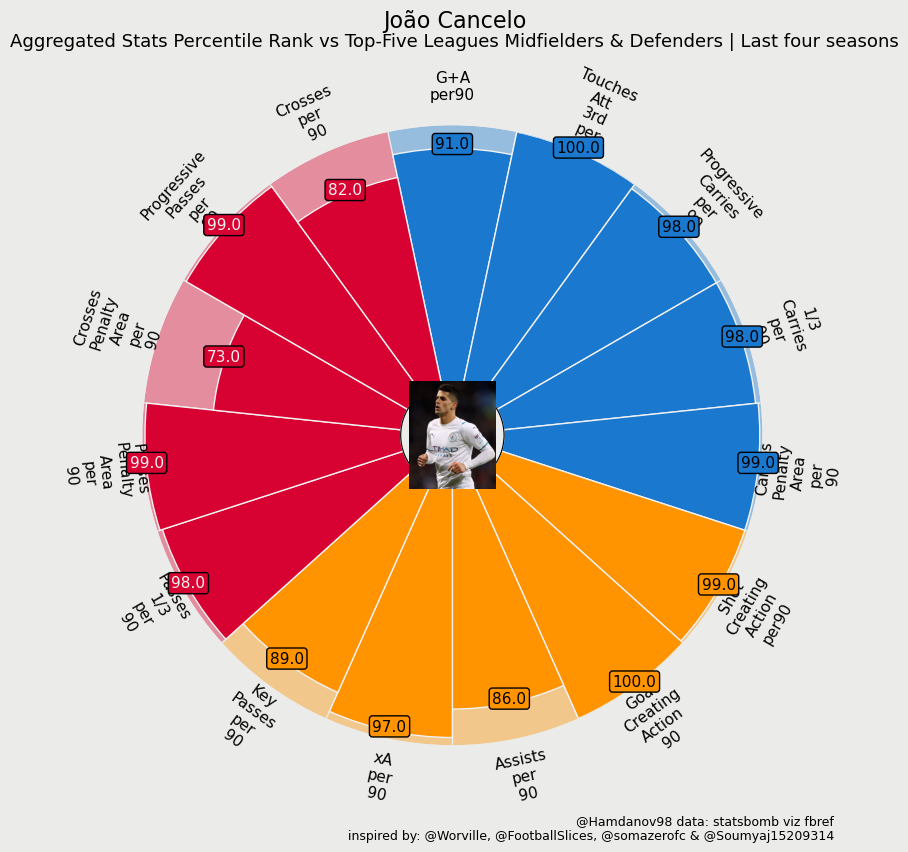

In [30]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    cancelo_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "João Cancelo", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Aggregated Stats Percentile Rank vs Top-Five Leagues Midfielders & Defenders | Last four seasons",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)





ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
plt.savefig('Cancelo/Cancelo_Percentile.png',dpi=500,bbox_inches = 'tight')  # save as png


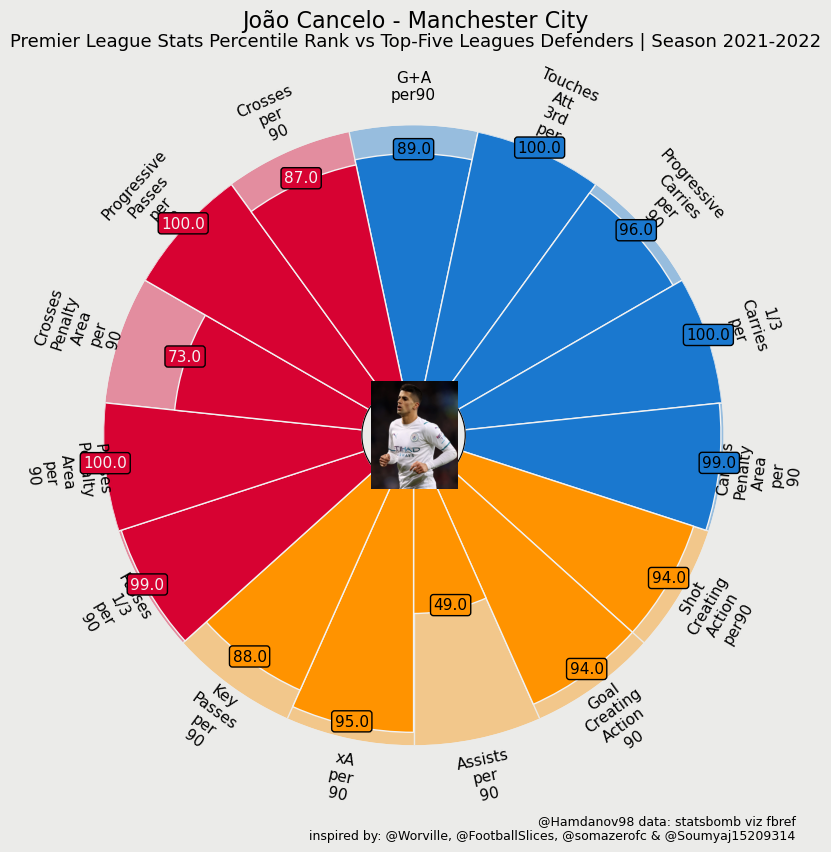

In [31]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params_2022, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    cancelo_2022_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "João Cancelo - Manchester City", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Premier League Stats Percentile Rank vs Top-Five Leagues Defenders | Season 2021-2022",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)





ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
plt.savefig('Cancelo_2022/Cancelo_2022_Percentile.png',dpi=500,bbox_inches = 'tight')  # save as png


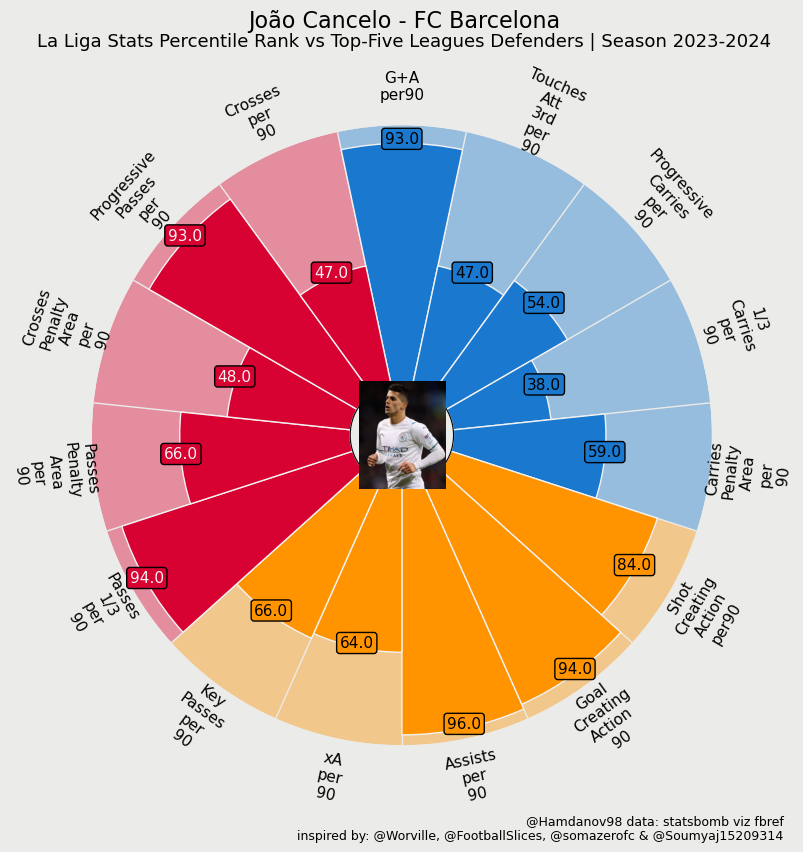

In [32]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params_2024, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    cancelo_2024_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "João Cancelo - FC Barcelona", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"La Liga Stats Percentile Rank vs Top-Five Leagues Defenders | Season 2023-2024",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)





ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
plt.savefig('Cancelo_2024/Cancelo_2024_Percentile.png',dpi=500,bbox_inches = 'tight')  # save as png


In [33]:
from sklearn.decomposition import PCA
import numpy as np

# Removing non-numerical columns
numerical_defender_players = defender_players.select_dtypes(include=np.number)
numerical_defender_players = numerical_defender_players.iloc[:, 9:]
numerical_defender_players = numerical_defender_players.replace([np.inf, -np.inf], 0)

# Normalizing the data
normalized_defender_players = (numerical_defender_players - numerical_defender_players.mean()) / numerical_defender_players.std()

# Applying PCA
explained_variances = []
for n in range(1, 16):  # For n from 1 to 10
    pca = PCA(n_components=n)
    pca.fit(normalized_defender_players)
    explained_variance = np.sum(pca.explained_variance_ratio_)
    explained_variances.append(explained_variance)

explained_variances


[0.24996266309339488,
 0.40192503002104557,
 0.46075693738343015,
 0.5131339088207336,
 0.5590921834687573,
 0.5978020787801933,
 0.6210623528243175,
 0.6409141271000369,
 0.6588746037506524,
 0.6754895063315003,
 0.6916837744942745,
 0.7072287887690571,
 0.7214705797963016,
 0.7347235061879265,
 0.7467702899520843]

In [34]:
from sklearn.metrics.pairwise import cosine_similarity

# Apply PCA with 10 components
pca = PCA(n_components=15)
transformed_players = pca.fit_transform(normalized_defender_players)

# Convert transformed data back to DataFrame
transformed_df = pd.DataFrame(transformed_players, index=numerical_defender_players.index)



In [35]:
# Remove Declan Rice's row and store it in a separate variable
cancelo_data = transformed_df.iloc[231].copy()
transformed_df = transformed_df.drop(transformed_df.index[231])

# Compute cosine similarity between each player and Declan Rice
similarity_scores = cosine_similarity(transformed_df, cancelo_data.values.reshape(1, -1))

# Add similarity scores to the dataframe
transformed_df['similarity_to_cancelo'] = similarity_scores

# Display the top 10 players most similar to rice
top_similar_players = transformed_df.sort_values('similarity_to_cancelo', ascending=False).head(10)
top_similar_players

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,similarity_to_cancelo
233,11.993318,10.951210,3.320578,-2.495234,6.271482,-4.686320,1.502272,3.682656,-1.167381,4.885745,3.267718,1.247210,-3.257845,-0.421934,2.277361,0.836510
11,4.619750,11.423248,-0.708238,-2.284922,1.542716,-1.008674,1.600652,-3.524107,0.497313,-1.884241,-0.688702,-1.731698,0.464877,-1.953299,0.372732,0.802199
157,8.832534,2.459930,-0.489043,-2.610406,3.234821,0.170324,2.127332,-1.381524,2.334096,5.148909,-1.311773,-0.470037,0.616499,2.593161,-0.773368,0.786349
146,2.834615,7.250360,-0.182044,-2.278211,-0.387600,-0.569497,-0.559979,-1.683266,0.446862,-1.012852,1.138012,-0.737421,1.167519,-0.986423,0.185038,0.769088
34,7.214545,4.176613,0.882894,-1.476070,0.356174,-0.993657,0.628038,-1.350675,-0.489293,-1.840464,-0.953939,0.353935,-0.332685,0.552392,-1.214725,0.765963
236,7.739101,5.972163,4.931150,-0.447482,-0.904659,-2.743037,0.629062,-0.071189,-1.096008,-0.162389,-0.026094,-1.222807,0.584070,-0.850740,-0.822729,0.762774
100,11.085505,9.608341,1.030551,1.710016,6.219286,0.661100,-3.525709,-0.887518,2.139177,0.189636,-0.490808,1.470334,1.502291,-2.990358,-0.906866,0.758839
56,8.536797,9.191178,-2.920872,-0.086251,5.729535,0.544287,-0.459905,2.895671,1.748409,0.070276,-1.518765,1.387805,-0.594806,-1.510810,1.977103,0.757608
115,9.533427,11.993840,-1.332559,5.048704,0.941986,1.806354,-3.088764,-1.569245,1.078682,0.615027,1.814152,1.069476,-1.108426,-0.530664,0.843811,0.754010
36,7.322772,3.691705,-1.940054,-0.094459,1.401782,-1.293280,4.143825,0.478272,1.493262,2.116798,-2.054636,-1.727979,1.537111,-0.511142,-0.370095,0.744963


In [36]:
# Get the top 10 players most similar to rice
top_similar_players_indices = transformed_df.sort_values('similarity_to_cancelo', ascending=False).index

# Use these indices to display the top 10 similar players from the original dataframe
top_similar_players = defender_players.loc[top_similar_players_indices]
top_similar_players

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Tackles_per_90,Tackles_Def_3rd_per_90,Tackles_Mid_3rd_per_90,Tackles_Att_3rd_per_90,Dribblers_Tackled_per_90,Dribblers_Challenged_per_90,Dribblers_Tackle_Lost_per_90,Blocks_per_90,Shots_Blocked_per_90,Tackles+Interceptions_per_90,Clearances_per_90,Errors_Shots_per_90,Dribblers_Tackle_W%,Seasons at top 5,Seasons in PL,Seasons in Liga,Seasons in Serie A,Seasons in Ligue 1,Seasons in Bundesliga
233,548,Alphonso Davies,ca CAN,DF,Bayern Munich,de Bundesliga,0.0,2000.0,100.0,90.0,7610,84.5,0.05,0.21,0.05,0.21,0.05,0.20,0.05,0.20,483.0,283.0,58.59,180.0,37.27,84.27,2.49,20.96,39.50,25.77,3.10,84.27,5.72,3.35,2.13,52.76,333.38,195.08,5.10,3.49,1.47,2.36,1.22,55.70,7.44,3.51,0.39,2.91,0.06,0.37,0.03,0.09,2.91,0.31,0.01,0.05,0.00,0.01,0.01,5229.0,6023.0,86.82,78103.0,19748.0,2866.0,3163.0,91.26,1951.0,2171.0,89.87,194.0,315.0,61.59,0.06,0.15,0.17,0.02,1.61,4.26,1.51,0.30,5.58,71.28,62.43,8.75,1.30,0.12,0.26,1.57,7.45,0.00,0.00,0.00,0.0,61.88,0.11,1.19,0.00,0.25,0.00,4.03,0.00,-0.2,-0.2,44.39,0.06,0.01,0.00,0.64,1.30,0.11,1.20,1.14,0.00,0.01,8.56,0.51,0.64,1.95,1.03,0.60,0.32,1.05,1.93,0.87,1.25,0.12,3.15,1.56,0.08,53.56,4,0,0,0,0,4
11,35,Giovanni Di Lorenzo,it ITA,DF,Napoli,it Serie A,0.0,1993.0,142.0,141.0,12600,140.0,0.06,0.20,0.06,0.20,0.08,0.20,0.08,0.20,192.0,80.0,41.67,102.0,53.12,82.20,2.97,20.74,40.30,21.80,2.73,82.20,1.37,0.57,0.73,50.05,223.86,123.96,2.42,1.65,0.31,0.74,0.59,58.18,5.56,3.01,0.34,2.57,0.09,0.11,0.14,0.06,2.57,0.27,0.01,0.02,0.03,0.02,0.00,8822.0,10295.0,85.69,138546.0,47038.0,4813.0,5180.0,92.93,3181.0,3634.0,87.53,585.0,884.0,66.18,0.04,0.13,0.12,0.01,1.29,5.70,1.78,0.31,7.25,73.54,62.74,10.61,1.63,0.12,0.58,2.39,8.94,0.03,0.00,0.00,0.0,63.02,0.19,1.44,0.00,0.25,0.00,7.89,0.00,-2.7,-2.7,54.04,0.16,0.00,0.00,1.04,1.28,0.14,0.91,1.08,0.01,0.01,4.69,1.19,1.01,1.82,1.02,0.61,0.19,0.95,1.78,0.83,

In [37]:
defender_players['similarity_to_cancelo']=transformed_df['similarity_to_cancelo']
defender_players[['Player', 'similarity_to_cancelo']]


,Player,similarity_to_cancelo
0,Nathaniel Clyne,-0.432148
1,Trevoh Chalobah,0.160694
2,Thilo Kehrer,-0.094785
3,Lukas Klostermann,-0.022778
4,Yunis Abdelhamid,0.076498
...,...,...
623,Chrislain Matsima,-0.561609
624,Yerry Mina,-0.838010
625,Sergio Reguilón,0.218441
626,Alex Sola,0.311820


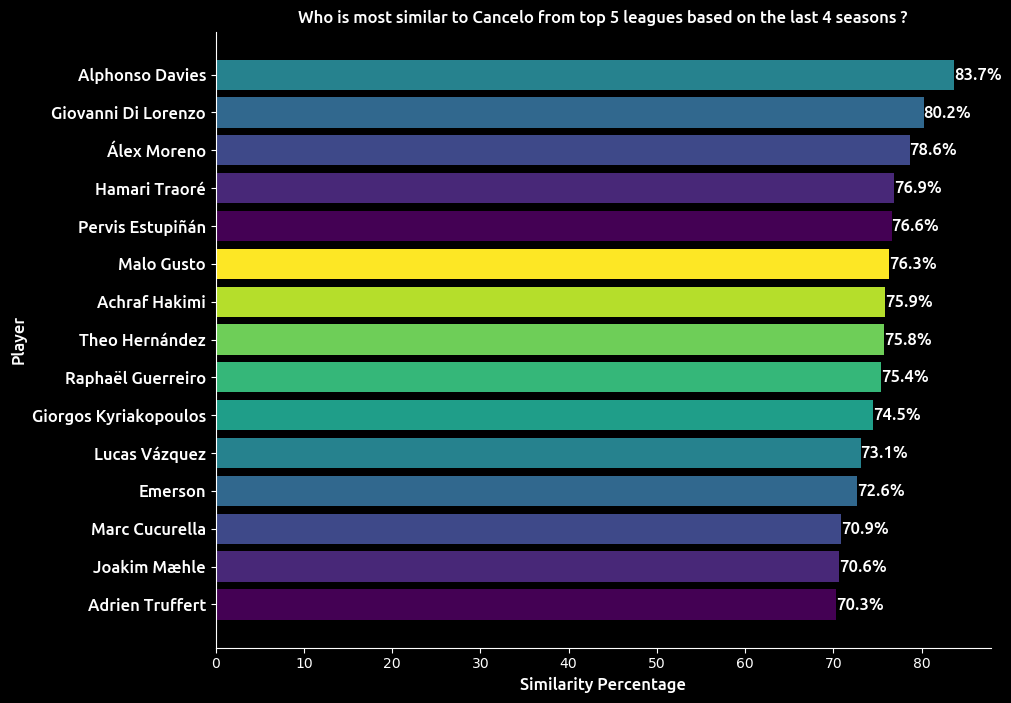

In [38]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

# Load the font
font_path = '../../Fonts/Ubuntu/Ubuntu-Medium.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)

# Use a dark background
plt.style.use('dark_background')

# Sort the defender_players DataFrame by similarity_to_rice in descending order
defender_players_sorted = defender_players.sort_values(by='similarity_to_cancelo', ascending=False)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the horizontal bar chart, but reverse the order of the data
bars = ax.barh(defender_players_sorted['Player'].head(15)[::-1], (defender_players_sorted['similarity_to_cancelo'].head(15)*100)[::-1],
               color=plt.cm.viridis(np.linspace(0, 1, 10)))

# Add labels and title
ax.set_xlabel('Similarity Percentage', fontproperties=font_prop)
ax.set_ylabel('Player', fontproperties=font_prop)
ax.set_title('Who is most similar to Cancelo from top 5 leagues based on the last 4 seasons ?', fontproperties=font_prop)

# Set the y-axis tick labels with the custom font
ax.set_yticklabels(defender_players_sorted['Player'].head(15)[::-1], fontproperties=font_prop)

# Remove gridlines
ax.grid(False)

# Make the top and right spines invisible
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Make the left and bottom spines white
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')

# Change the color of ticks to white
ax.tick_params(colors='white')

# Change the color of labels to white
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')

# Add percentage labels to the bars
for bar in bars:
    width = bar.get_width()
    y_pos = bar.get_y() + bar.get_height() / 2
    ax.text(width, y_pos, f'{width:.1f}%', ha='left', va='center',
            color='white', fontproperties=font_prop)


# Save the figure
plt.savefig('Cancelo/Similar.png' ,dpi=500,bbox_inches = 'tight',transparent=False)

plt.show()


In [39]:
player_2024 = player_2024[player_2024['Player'] != 'João Cancelo']
player_2024


,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Tackles_per_90,Tackles_Def_3rd_per_90,Tackles_Mid_3rd_per_90,Tackles_Att_3rd_per_90,Dribblers_Tackled_per_90,Dribblers_Challenged_per_90,Dribblers_Tackle_Lost_per_90,Blocks_per_90,Shots_Blocked_per_90,Tackles+Interceptions_per_90,Clearances_per_90,Errors_Shots_per_90,Dribblers_Tackle_W%
0,0,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,0.0,2000.0,20,13,1237,13.7,0.00,0.07,0.00,0.07,0.00,0.06,0.00,0.06,34.0,14.0,41.2,12.0,35.3,51.90,3.14,18.39,22.12,12.04,0.80,51.90,2.48,1.02,0.88,26.57,158.69,81.82,1.61,0.88,0.51,0.95,0.58,27.08,1.90,1.68,0.15,1.17,0.29,0.00,0.00,0.22,0.00,0.15,0.00,0.00,0.00,0.0,0.0,450.0,581.0,77.5,7402.0,2789.0,220.0,248.0,88.7,188.0,235.0,80.0,34.0,63.0,54.0,0.07,0.06,0.07,0.01,0.51,1.82,0.95,0.15,3.14,42.41,33.07,9.27,0.80,0.15,0.22,0.95,8.47,0.00,0.00,0.00,0.00,32.85,0.07,1.68,0.15,0.00,0.00,0.00,0.02,0.0,0.0,31.3,0.07,0.00,0.00,0.88,1.90,0.15,0.58,1.39,0.0,0.07,5.47,0.36,0.80,2.12,1.46,0.51,0.15,1.46,2.48,1.02,0.66,0.36,2.70,1.97,0.00,58.8
2,4,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,0.0,1987.0,31,31,2781,30.9,0.13,0.13,0.10,0.10,0.11,0.12,0.09,0.09,15.0,8.0,53.3,7.0,46.7,70.71,9.48,31.59,36.21,3.69,1.13,70.68,0.49,0.26,0.23,48.74,280.36,159.26,1.17,0.61,0.00,0.74,0.13,45.40,0.29,0.78,0.03,0.61,0.03,0.00,0.10,0.03,0.00,0.00,0.00,0.00,0.03,0.0,0.0,1552.0,1836.0,84.5,29618.0,9672.0,487.0,548.0,88.9,893.0,976.0,91.5,141.0,252.0,56.0,0.00,0.01,0.02,-0.01,0.26,4.17,0.10,0.00,4.43,59.42,53.40,5.76,2.43,0.06,0.42,0.10,0.94,0.00,0.00,0.00,0.00,50.23,0.26,0.65,0.68,0.23,0.14,0.43,0.13,0.6,0.4,62.2,0.16,0.00,0.00,0.84,0.39,0.00,1.26,1.13,0.0,0.00,4.82,1.97,1.20,2.07,1.17,0.74,0.16,0.84,1.46,0.61,1.65,1.04,3.33,3.53,0.06,57.8
6,9,Abner,br BRA,DF,Betis,es La Liga,0.0,2000.0,23,15,1400,15.6,0.00,0.06,0.00,0.06,0.01,0.07,0.01,0.07,13.0,7.0,53.8,5.0,38.5,61.92,4.62,22.05,25.96,14.49,1.79,6

In [40]:
player_2024=pd.concat([player_2024,Cancelo_2024])
player_2024=player_2024.reset_index(drop=True)
player_2024

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Tackles_per_90,Tackles_Def_3rd_per_90,Tackles_Mid_3rd_per_90,Tackles_Att_3rd_per_90,Dribblers_Tackled_per_90,Dribblers_Challenged_per_90,Dribblers_Tackle_Lost_per_90,Blocks_per_90,Shots_Blocked_per_90,Tackles+Interceptions_per_90,Clearances_per_90,Errors_Shots_per_90,Dribblers_Tackle_W%
0,0,Max Aarons,eng ENG,DF,Bournemouth,eng Premier League,0.0,2000.0,20,13,1237,13.7,0.00,0.07,0.00,0.07,0.00,0.06,0.00,0.06,34.0,14.0,41.2,12.0,35.3,51.90,3.14,18.39,22.12,12.04,0.80,51.90,2.48,1.02,0.88,26.57,158.69,81.82,1.61,0.88,0.51,0.95,0.58,27.08,1.90,1.68,0.15,1.17,0.29,0.00,0.00,0.22,0.00,0.15,0.0,0.00,0.00,0.0,0.0,450.0,581.0,77.5,7402.0,2789.0,220.0,248.0,88.7,188.0,235.0,80.0,34.0,63.0,54.0,0.07,0.06,0.07,0.01,0.51,1.82,0.95,0.15,3.14,42.41,33.07,9.27,0.80,0.15,0.22,0.95,8.47,0.00,0.0,0.00,0.00,32.85,0.07,1.68,0.15,0.00,0.00,0.00,0.02,0.0,0.0,31.3,0.07,0.00,0.00,0.88,1.90,0.15,0.58,1.39,0.0,0.07,5.47,0.36,0.80,2.12,1.46,0.51,0.15,1.46,2.48,1.02,0.66,0.36,2.70,1.97,0.00,58.8
1,4,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,0.0,1987.0,31,31,2781,30.9,0.13,0.13,0.10,0.10,0.11,0.12,0.09,0.09,15.0,8.0,53.3,7.0,46.7,70.71,9.48,31.59,36.21,3.69,1.13,70.68,0.49,0.26,0.23,48.74,280.36,159.26,1.17,0.61,0.00,0.74,0.13,45.40,0.29,0.78,0.03,0.61,0.03,0.00,0.10,0.03,0.00,0.00,0.0,0.00,0.03,0.0,0.0,1552.0,1836.0,84.5,29618.0,9672.0,487.0,548.0,88.9,893.0,976.0,91.5,141.0,252.0,56.0,0.00,0.01,0.02,-0.01,0.26,4.17,0.10,0.00,4.43,59.42,53.40,5.76,2.43,0.06,0.42,0.10,0.94,0.00,0.0,0.00,0.00,50.23,0.26,0.65,0.68,0.23,0.14,0.43,0.13,0.6,0.4,62.2,0.16,0.00,0.00,0.84,0.39,0.00,1.26,1.13,0.0,0.00,4.82,1.97,1.20,2.07,1.17,0.74,0.16,0.84,1.46,0.61,1.65,1.04,3.33,3.53,0.06,57.8
2,9,Abner,br BRA,DF,Betis,es La Liga,0.0,2000.0,23,15,1400,15.6,0.00,0.06,0.00,0.06,0.01,0.07,0.01,0.07,13.0,7.0,53.8,5.0,38.5,61.92,4.62,22.05,25.96,14.49,1.79,61.92

In [41]:
from sklearn.decomposition import PCA
import numpy as np

# Removing non-numerical columns
numerical_midfield_players = player_2024.select_dtypes(include=np.number)
numerical_midfield_players = numerical_midfield_players.iloc[:, 9:]
numerical_midfield_players = numerical_midfield_players.replace([np.inf, -np.inf], 0)

# Normalizing the data
normalized_midfield_players = (numerical_midfield_players - numerical_midfield_players.mean()) / numerical_midfield_players.std()

# Applying PCA
explained_variances = []
for n in range(1, 16):  # For n from 1 to 10
    pca = PCA(n_components=n)
    pca.fit(normalized_midfield_players)
    explained_variance = np.sum(pca.explained_variance_ratio_)
    explained_variances.append(explained_variance)

explained_variances


[0.26050097774575937,
 0.40449240940685127,
 0.4640177017552892,
 0.5165125776873726,
 0.5603436128961911,
 0.5956364428114505,
 0.6246795505841669,
 0.6459450803856817,
 0.665501313950549,
 0.6835745964682143,
 0.6994142852258854,
 0.7133999104235785,
 0.7272360872628945,
 0.7405263763741041,
 0.7528336171865174]

In [42]:
from sklearn.metrics.pairwise import cosine_similarity

# Apply PCA with 10 components
pca = PCA(n_components=15)
transformed_players = pca.fit_transform(normalized_midfield_players)

# Convert transformed data back to DataFrame
transformed_df = pd.DataFrame(transformed_players, index=numerical_midfield_players.index)



In [43]:
# Remove cancelo_2023's row and store it in a separate variable
cancelo_2024_data = transformed_df.iloc[-1].copy()
transformed_df = transformed_df.drop(transformed_df.index[-1])

# Compute cosine similarity between each player and Declan cancelo_2023
similarity_scores = cosine_similarity(transformed_df, cancelo_2024_data.values.reshape(1, -1))

# Add similarity scores to the dataframe
transformed_df['similarity_to_cancelo_2024'] = similarity_scores

# Display the top 10 players most similar to cancelo_2023
top_similar_players = transformed_df.sort_values('similarity_to_cancelo_2024', ascending=False).head(10)
top_similar_players

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,similarity_to_cancelo_2024
139,10.439557,9.430809,-3.569692,3.053724,-5.443240,1.922162,-4.145367,2.764945,5.907768,-3.844307,-1.518109,0.939946,-0.041045,1.683513,0.754590,0.887772
401,6.037463,3.125858,-1.559822,0.147113,-0.835641,0.990587,-2.298866,-1.266044,0.240475,-1.322092,-0.388964,-0.541842,-1.027868,0.125879,-0.120190,0.862202
504,8.625382,3.063322,-3.496618,0.956588,-4.411872,3.458071,-1.194109,4.261972,0.888421,-0.428345,1.114940,-0.405527,-0.748293,0.183023,-1.274613,0.850574
381,6.843011,5.585051,0.189995,-1.749033,-1.371608,3.379736,-0.601673,0.130008,-1.714254,1.228167,-0.365895,0.674106,2.440095,1.137214,-0.317714,0.846919
596,11.839239,3.759387,-0.164347,4.061340,-2.786697,4.260286,0.507141,-1.955778,1.895250,-0.477043,-1.583078,-0.837432,0.206836,0.104763,-0.886831,0.840504
304,7.398462,7.843337,-4.283686,0.737903,-1.325659,-1.870170,1.936886,-0.976848,0.575693,-0.625816,-1.826117,0.220721,-0.539365,0.513348,1.607555,0.813327
235,10.610968,16.083577,1.647400,5.428643,-2.752021,-2.101935,2.396662,-1.029859,-0.394708,0.598000,-1.538147,0.154508,-0.073415,0.178504,-0.282460,0.805399
126,13.245675,5.309763,-0.552703,3.440865,-6.867454,2.771040,0.253884,1.164327,4.820494,-0.773368,3.127412,0.690018,0.657432,2.014382,-1.950431,0.801879
239,7.599013,5.072400,-1.586011,0.935092,-0.193131,2.303821,2.454767,-2.987084,0.628660,1.040222,-1.403112,0.556662,1.551462,-0.878798,1.031220,0.798730
245,6.021024,8.970635,3.256104,3.586678,-3.116653,2.854726,1.251924,1.409422,0.472825,1.801034,0.591593,-0.786242,-1.164677,-0.007152,-0.573847,0.797924


In [44]:
# Get the top 10 players most similar to rice
top_similar_players_indices = transformed_df.sort_values('similarity_to_cancelo_2024', ascending=False).index

# Use these indices to display the top 10 similar players from the original dataframe
top_similar_players = player_2024.loc[top_similar_players_indices]
top_similar_players

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Tackles_per_90,Tackles_Def_3rd_per_90,Tackles_Mid_3rd_per_90,Tackles_Att_3rd_per_90,Dribblers_Tackled_per_90,Dribblers_Challenged_per_90,Dribblers_Tackle_Lost_per_90,Blocks_per_90,Shots_Blocked_per_90,Tackles+Interceptions_per_90,Clearances_per_90,Errors_Shots_per_90,Dribblers_Tackle_W%
139,649,Alphonso Davies,ca CAN,DF,Bayern Munich,de Bundesliga,0.0,2000.0,29,24,2065,22.9,0.09,0.31,0.09,0.31,0.04,0.17,0.04,0.17,122.0,70.0,57.4,47.0,38.5,84.45,2.62,23.89,38.03,24.37,2.79,84.45,5.33,3.06,2.05,53.49,335.50,195.72,5.28,4.06,1.53,1.75,1.05,58.47,6.07,3.31,0.61,2.75,0.04,0.31,0.04,0.09,0.09,0.44,0.04,0.09,0.00,0.04,0.0,1440.0,1642.0,87.7,20701.0,5332.0,847.0,929.0,91.2,536.0,589.0,91.0,27.0,52.0,51.9,0.22,0.13,0.14,0.09,1.62,3.84,1.35,0.31,5.11,71.70,63.54,8.17,1.18,0.17,0.04,1.35,6.99,0.00,0.00,0.00,0.0,62.88,0.00,1.35,0.57,0.17,0.15,0.50,0.08,1.0,1.0,60.9,0.00,0.00,0.00,0.70,0.87,0.00,1.14,1.05,0.0,0.04,7.82,0.61,0.39,2.05,1.27,0.57,0.22,1.31,2.31,1.00,1.31,0.17,3.19,2.14,0.04,56.6
401,1856,Joakim Mæhle,dk DEN,"DF,MF",Wolfsburg,de Bundesliga,0.0,1997.0,30,27,2452,27.2,0.07,0.18,0.07,0.18,0.05,0.15,0.05,0.15,58.0,22.0,37.9,29.0,50.0,68.05,3.12,19.15,29.93,19.71,2.06,68.05,2.13,0.81,1.07,35.40,203.93,111.07,3.09,2.21,0.44,1.29,0.55,38.64,5.04,2.50,0.37,2.06,0.11,0.22,0.04,0.04,0.04,0.26,0.04,0.04,0.04,0.00,0.0,1263.0,1555.0,81.2,19313.0,7037.0,694.0,760.0,91.3,473.0,573.0,82.5,60.0,121.0,49.6,0.11,0.10,0.19,0.01,0.81,3.16,0.99,0.29,4.38,57.17,46.32,10.62,1.25,0.00,0.22,2.21,9.34,0.00,0.00,0.00,0.0,46.43,0.22,1.54,0.73,0.22,0.10,0.33,0.07,0.6,0.6,47.8,0.18,0.00,0.00,0.70,0.55,0.07,1.07,1.43,0.0,0.04,4.93,0.81,0.88,2.28,1.21,0.66,0.40,1.51,2.35,0.85,1.58,0.18,3.35,2.39,0.00,64.1
504,2355,Tiago santos,pt POR,DF,Lille,fr Ligue 1,0.0,2002.0,29,26,2365,26.3,0.04,0.11,0.04,0.11,0.05,0.14,0.05,0.14,105.0,54.0,51.4,36.0,

In [45]:
player_2024['similarity_to_cancelo_2024']=transformed_df['similarity_to_cancelo_2024']
player_2024[['Player', 'similarity_to_cancelo_2024']]


,Player,similarity_to_cancelo_2024
0,Max Aarons,0.129820
1,Yunis Abdelhamid,-0.144921
2,Abner,-0.320680
3,Abdel Abqar,-0.729466
4,Francesco Acerbi,-0.295355
...,...,...
647,Kevin Vogt,-0.350476
648,Mateusz Wieteska,-0.608794
649,Alessandro Zanoli,0.085981
650,Nadir Zortea,0.519006


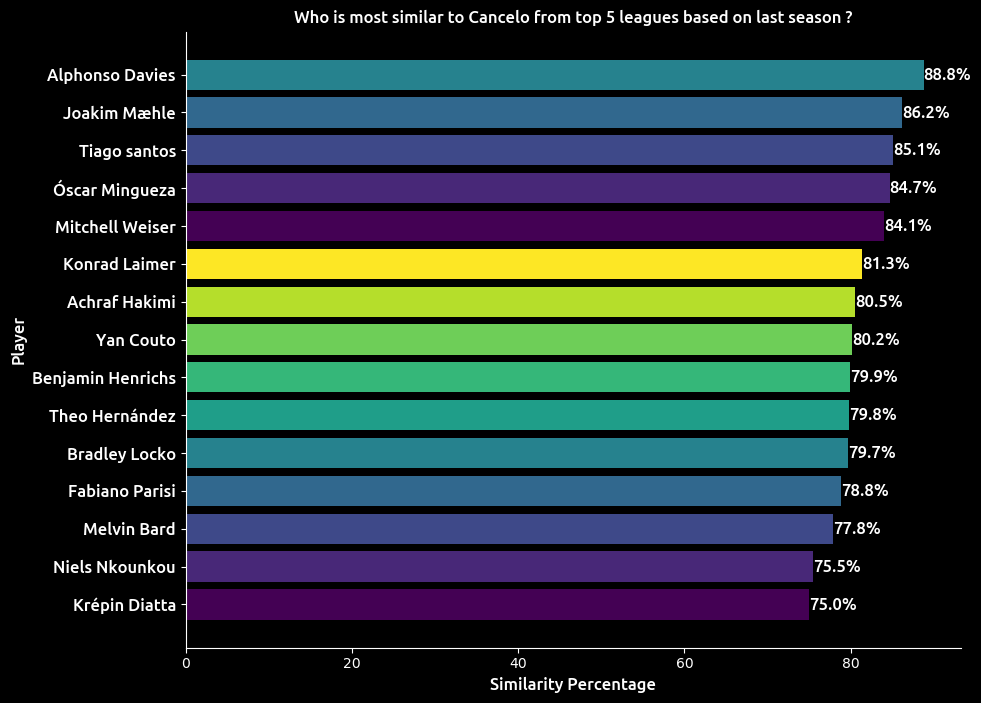

In [46]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

# Load the font
font_path = '../../Fonts/Ubuntu/Ubuntu-Medium.ttf'
font_prop = fm.FontProperties(fname=font_path, size=12)

# Use a dark background
plt.style.use('dark_background')

# Sort the player_2023 DataFrame by similarity_to_cancelo_2023 in descending order
player_2024_sorted = player_2024.sort_values(by='similarity_to_cancelo_2024', ascending=False)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the horizontal bar chart, but reverse the order of the data
bars = ax.barh(player_2024_sorted['Player'].head(15)[::-1], (player_2024_sorted['similarity_to_cancelo_2024'].head(15)*100)[::-1],
               color=plt.cm.viridis(np.linspace(0, 1, 10)))

# Add labels and title
ax.set_xlabel('Similarity Percentage', fontproperties=font_prop)
ax.set_ylabel('Player', fontproperties=font_prop)
ax.set_title('Who is most similar to Cancelo from top 5 leagues based on last season ?', fontproperties=font_prop)

# Set the y-axis tick labels with the custom font
ax.set_yticklabels(player_2024_sorted['Player'].head(15)[::-1], fontproperties=font_prop)

# Remove gridlines
ax.grid(False)

# Make the top and right spines invisible
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Make the left and bottom spines white
ax.spines['left'].set_color('white')
ax.spines['bottom'].set_color('white')

# Change the color of ticks to white
ax.tick_params(colors='white')

# Change the color of labels to white
ax.xaxis.label.set_color('white')
ax.yaxis.label.set_color('white')
ax.title.set_color('white')

# Add percentage labels to the bars
for bar in bars:
    width = bar.get_width()
    y_pos = bar.get_y() + bar.get_height() / 2
    ax.text(width, y_pos, f'{width:.1f}%', ha='left', va='center',
            color='white', fontproperties=font_prop)


# Save the figure
plt.savefig('Cancelo_2024/Similar.png' ,dpi=500,bbox_inches = 'tight',transparent=False)

plt.show()


In [47]:
Santos=player_2024[player_2024['Player']=='Tiago santos']
Santos

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Tackles_per_90,Tackles_Def_3rd_per_90,Tackles_Mid_3rd_per_90,Tackles_Att_3rd_per_90,Dribblers_Tackled_per_90,Dribblers_Challenged_per_90,Dribblers_Tackle_Lost_per_90,Blocks_per_90,Shots_Blocked_per_90,Tackles+Interceptions_per_90,Clearances_per_90,Errors_Shots_per_90,Dribblers_Tackle_W%,similarity_to_cancelo_2024
504,2355,Tiago santos,pt POR,DF,Lille,fr Ligue 1,0.0,2002.0,29,26,2365,26.3,0.04,0.11,0.04,0.11,0.05,0.14,0.05,0.14,105.0,54.0,51.4,36.0,34.3,65.21,1.9,14.11,33.31,18.78,2.02,65.21,3.99,2.05,1.37,44.37,301.83,144.87,3.38,2.09,0.84,1.67,0.99,41.06,5.21,2.59,0.23,1.75,0.15,0.27,0.0,0.38,0.04,0.15,0.04,0.04,0.0,0.0,0.0,1113.0,1396.0,79.7,18957.0,4850.0,509.0,582.0,87.5,483.0,582.0,83.0,94.0,178.0,52.8,0.08,0.09,0.1,-0.01,1.03,3.16,0.95,0.38,3.99,53.08,42.93,10.11,2.21,0.04,0.34,3.16,7.91,0.0,0.0,0.0,0.0,42.32,0.04,1.14,1.26,0.27,0.03,0.14,0.04,-0.4,-0.4,34.3,0.23,0.0,0.0,1.44,3.31,0.0,0.57,1.6,0.0,0.04,4.83,0.46,0.87,2.4,1.18,0.72,0.49,1.14,1.98,0.84,0.91,0.19,2.97,1.41,0.0,57.7,0.850574


In [48]:
DiLorenzo=defender_players[defender_players['Player']=='Giovanni Di Lorenzo']
DiLorenzo

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Tackles_per_90,Tackles_Def_3rd_per_90,Tackles_Mid_3rd_per_90,Tackles_Att_3rd_per_90,Dribblers_Tackled_per_90,Dribblers_Challenged_per_90,Dribblers_Tackle_Lost_per_90,Blocks_per_90,Shots_Blocked_per_90,Tackles+Interceptions_per_90,Clearances_per_90,Errors_Shots_per_90,Dribblers_Tackle_W%,Seasons at top 5,Seasons in PL,Seasons in Liga,Seasons in Serie A,Seasons in Ligue 1,Seasons in Bundesliga,similarity_to_cancelo
11,35,Giovanni Di Lorenzo,it ITA,DF,Napoli,it Serie A,0.0,1993.0,142.0,141.0,12600,140.0,0.06,0.2,0.06,0.2,0.08,0.2,0.08,0.2,192.0,80.0,41.67,102.0,53.12,82.2,2.97,20.74,40.3,21.8,2.73,82.2,1.37,0.57,0.73,50.05,223.86,123.96,2.42,1.65,0.31,0.74,0.59,58.18,5.56,3.01,0.34,2.57,0.09,0.11,0.14,0.06,2.57,0.27,0.01,0.02,0.03,0.02,0.0,8822.0,10295.0,85.69,138546.0,47038.0,4813.0,5180.0,92.93,3181.0,3634.0,87.53,585.0,884.0,66.18,0.04,0.13,0.12,0.01,1.29,5.7,1.78,0.31,7.25,73.54,62.74,10.61,1.63,0.12,0.58,2.39,8.94,0.03,0.0,0.0,0.0,63.02,0.19,1.44,0.0,0.25,0.0,7.89,0.0,-2.7,-2.7,54.04,0.16,0.0,0.0,1.04,1.28,0.14,0.91,1.08,0.01,0.01,4.69,1.19,1.01,1.82,1.02,0.61,0.19,0.95,1.78,0.83,0.99,0.34,2.73,1.54,0.01,52.96,4,0,0,4,0,0,0.802199


In [49]:
Traore=defender_players[defender_players['Player']=='Hamari Traoré']
Traore

,Unnamed: 0,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Goals_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Take_Ons_Attempted,Take_Ons_Succ,Take_Ons_Succ%,Tackled_Take_Ons,Tackled_Take_Ons%,Touches_per_90,Touches_Def_Pen_per_90,Touches_Def_3rd_per_90,Touches_Mid_3rd_per_90,Touches_Att_3rd_per_90,Touches_Att_Pen_per_90,Tocuhes_Live_Balls_per_90,Take_Ons_Attempted_per_90,Take_Ons_Succ_per_90,Tackled_Take_Ons_per_90,Carries_per_90,Total_Distance_per_90,Progressive_Distance_Carried_per_90,Progressive_Carries_per_90,1/3_Carries_per_90,Carries_Penalty_Area_per_90,Miscontrols_per_90,Dispossessed_per_90,Passes_Received_per_90,Progressive_Passes_Received_per_90,Shot_Creating_Action_per90,Goal_Creating_Action_90,Pass_Live_Shot_per_90,Pass_Dead_Shot_per_90,Take_Ons_Shot_per_90,Shot-Shot_per_90,Fouls_drawn_Shot_per_90,Defensive_Shot_per_90,Pass_Live_Goal_per_90,Pass_Dead_Goal_per_90,Take_Ons_Goal_per_90,Shot_Goal_per_90,Fouls_Drawn_Goal_per_90,Defensive_Goal_per_90,Passes_Total_Cmp,Passes_Total_Att,Passes_Total_Cmp%,Passes_TotDist,Passes_PrgDist,Passes_Short_Cmp,Passes_Short_Att,Passes_Short_Cmp%,Passes_Medium_Cmp,Passes_Medium_Att,Passes_Medium_Cmp%,Passes_Long_Cmp,Passes_Long_Att,Passes_Long_Cmp%,Assists_per_90,xAG_per_90,xA_per_90,A-xAG_per_90,Key_Passes_per_90,Passes_1/3_per_90,Passes_Penalty_Area_per_90,Crosses_Penalty_Area_per_90,Progressive_Passes_per_90,Passes_Attempted_per_90,Live_Ball_Passes_per_90,Dead_Ball_Passes_per_90,Free_Kick_Passes_per_90,Through_Balls_per_90,Switches_per_90,Crosses_per_90,Throw_Ins_Taken_per_90,Corner_Kicks_per_90,In_Corner_Kicks_per_90,Out_Corner_Kicks_per_90,Str_Corner_Kicks_per_90,Passes_Cmp_per_90,Passes_Off_per_90,Passes_Blocked_per_90,Shots_total_per90,Shots_on_target_per90,Goals_per_shot,Goals_per_shot_on_target,Npxg_per_shot,Xg_net,Npxg_net,Percentage_of_Aerials_Won,Yellow_Cards_per_90,Red_Cards_per_90,Second_Yellow_Card_per_90,Fouls_Committed_per_90,Fouls_Drawn_per_90,Offsides_per_90,Interceptions_per_90,Tackles_Won_per_90,Penalty_Kicks_Won_per_90,Penalty_Kicks_Conceded_per_90,Ball_Recoveries_per_90,Aerials_Won_per_90,Aerials_Lost_per_90,Tackles_per_90,Tackles_Def_3rd_per_90,Tackles_Mid_3rd_per_90,Tackles_Att_3rd_per_90,Dribblers_Tackled_per_90,Dribblers_Challenged_per_90,Dribblers_Tackle_Lost_per_90,Blocks_per_90,Shots_Blocked_per_90,Tackles+Interceptions_per_90,Clearances_per_90,Errors_Shots_per_90,Dribblers_Tackle_W%,Seasons at top 5,Seasons in PL,Seasons in Liga,Seasons in Serie A,Seasons in Ligue 1,Seasons in Bundesliga,similarity_to_cancelo
146,347,Hamari Traoré,ml MLI,DF,Real Sociedad+Rennes,es La Liga+fr Ligue 1,0.0,1992.0,130.0,122.0,10710,119.0,0.04,0.18,0.04,0.18,0.05,0.15,0.05,0.15,100.0,58.0,58.0,40.0,40.0,75.94,2.85,16.81,40.75,18.84,1.52,75.94,0.84,0.49,0.33,44.82,216.87,106.77,2.02,1.83,0.28,0.91,0.28,47.97,5.56,2.45,0.33,2.07,0.14,0.04,0.09,0.03,2.07,0.26,0.02,0.02,0.02,0.01,0.01,6565.0,7951.0,82.57,115347.0,34892.0,2691.0,3032.0,88.7,3067.0,3548.0,86.44,568.0,925.0,61.41,0.02,0.1,0.12,0.04,1.01,4.86,1.31,0.47,5.62,66.81,57.05,9.61,1.0,0.09,0.36,2.72,8.6,0.01,0.0,0.0,0.0,55.17,0.16,0.96,0.0,0.21,0.0,6.04,0.0,-0.1,-0.1,46.18,0.17,0.0,0.0,1.27,0.61,0.13,1.47,1.05,0.01,0.04,5.65,1.15,1.34,1.77,0.82,0.71,0.23,0.98,1.79,0.81,1.01,0.23,3.24,2.13,0.03,54.34,4,0,1,0,3,0,0.769088


In [50]:
import pandas as pd






params=[ 'G+A_per90','Touches_Att_3rd_per_90','Progressive_Carries_per_90',
             '1/3_Carries_per_90', 'Carries_Penalty_Area_per_90', 'Shot_Creating_Action_per90',
             'Goal_Creating_Action_90', 'Assists_per_90' ,'xA_per_90',
             'Key_Passes_per_90', 'Passes_1/3_per_90' , 'Passes_Penalty_Area_per_90',
             'Crosses_Penalty_Area_per_90'  ,'Progressive_Passes_per_90' ,  'Crosses_per_90']


# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_percentile_ranks = defender_players[params].rank(pct=True) * 100

# Get the row of Harry Kane's stats from the percentile ranks DataFrame
traore_percentile_ranks = round(players_percentile_ranks.iloc[[146]],0)

# Print the percentile ranks for Declan Rice
print(traore_percentile_ranks)


     G+A_per90  Touches_Att_3rd_per_90  Progressive_Carries_per_90  \
146       83.0                    85.0                        76.0   

     1/3_Carries_per_90  Carries_Penalty_Area_per_90  \
146                86.0                         77.0   

     Shot_Creating_Action_per90  Goal_Creating_Action_90  Assists_per_90  \
146                        84.0                     90.0            56.0   

     xA_per_90  Key_Passes_per_90  Passes_1/3_per_90  \
146       86.0               83.0               92.0   

     Passes_Penalty_Area_per_90  Crosses_Penalty_Area_per_90  \
146                        89.0                         77.0   

     Progressive_Passes_per_90  Crosses_per_90  
146                       94.0            77.0  


In [51]:
import pandas as pd






params=[ 'G+A_per90','Touches_Att_3rd_per_90','Progressive_Carries_per_90',
             '1/3_Carries_per_90', 'Carries_Penalty_Area_per_90', 'Shot_Creating_Action_per90',
             'Goal_Creating_Action_90', 'Assists_per_90' ,'xA_per_90',
             'Key_Passes_per_90', 'Passes_1/3_per_90' , 'Passes_Penalty_Area_per_90',
             'Crosses_Penalty_Area_per_90'  ,'Progressive_Passes_per_90' ,  'Crosses_per_90']


# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_percentile_ranks = defender_players[params].rank(pct=True) * 100

# Get the row of Harry Kane's stats from the percentile ranks DataFrame
lorenzo_percentile_ranks = round(players_percentile_ranks.iloc[[11]],0)

# Print the percentile ranks for Declan Rice
print(lorenzo_percentile_ranks)


    G+A_per90  Touches_Att_3rd_per_90  Progressive_Carries_per_90  \
11       86.0                    93.0                        86.0   

    1/3_Carries_per_90  Carries_Penalty_Area_per_90  \
11                80.0                         80.0   

    Shot_Creating_Action_per90  Goal_Creating_Action_90  Assists_per_90  \
11                        91.0                     91.0            71.0   

    xA_per_90  Key_Passes_per_90  Passes_1/3_per_90  \
11       86.0               90.0               96.0   

    Passes_Penalty_Area_per_90  Crosses_Penalty_Area_per_90  \
11                        97.0                         67.0   

    Progressive_Passes_per_90  Crosses_per_90  
11                       99.0            72.0  


In [52]:

params_2024=[ 'G+A_per90','Touches_Att_3rd_per_90','Progressive_Carries_per_90',
             '1/3_Carries_per_90', 'Carries_Penalty_Area_per_90', 'Shot_Creating_Action_per90',
             'Goal_Creating_Action_90', 'Assists_per_90' ,'xA_per_90',
             'Key_Passes_per_90', 'Passes_1/3_per_90' , 'Passes_Penalty_Area_per_90',
             'Crosses_Penalty_Area_per_90'  ,'Progressive_Passes_per_90' ,  'Crosses_per_90']


# Calculate percentile ranks for the goalkeepers in the larger DataFrame
players_2024_percentile_ranks = player_2024[params_2024].rank(pct=True) * 100

# Get the row of André Onana's stats from the percentile ranks DataFrame
santos_2024_percentile_ranks = round(players_2024_percentile_ranks.iloc[[504]],0)

# Print the percentile ranks for Declan Rice
print(santos_2024_percentile_ranks)


     G+A_per90  Touches_Att_3rd_per_90  Progressive_Carries_per_90  \
504       61.0                    85.0                        96.0   

     1/3_Carries_per_90  Carries_Penalty_Area_per_90  \
504                91.0                         96.0   

     Shot_Creating_Action_per90  Goal_Creating_Action_90  Assists_per_90  \
504                        88.0                     77.0            68.0   

     xA_per_90  Key_Passes_per_90  Passes_1/3_per_90  \
504       79.0               81.0               60.0   

     Passes_Penalty_Area_per_90  Crosses_Penalty_Area_per_90  \
504                        74.0                         70.0   

     Progressive_Passes_per_90  Crosses_per_90  
504                       66.0            82.0  


In [53]:
santos_2024_percentile_ranks_list = santos_2024_percentile_ranks.values.flatten().tolist()

santos_2024_percentile_ranks_list

[61.0,
 85.0,
 96.0,
 91.0,
 96.0,
 88.0,
 77.0,
 68.0,
 79.0,
 81.0,
 60.0,
 74.0,
 70.0,
 66.0,
 82.0]

In [54]:
traore_percentile_ranks_list = traore_percentile_ranks.values.flatten().tolist()

traore_percentile_ranks_list

[83.0,
 85.0,
 76.0,
 86.0,
 77.0,
 84.0,
 90.0,
 56.0,
 86.0,
 83.0,
 92.0,
 89.0,
 77.0,
 94.0,
 77.0]

In [55]:
lorenzo_percentile_ranks_list = lorenzo_percentile_ranks.values.flatten().tolist()

lorenzo_percentile_ranks_list

[86.0,
 93.0,
 86.0,
 80.0,
 80.0,
 91.0,
 91.0,
 71.0,
 86.0,
 90.0,
 96.0,
 97.0,
 67.0,
 99.0,
 72.0]

In [56]:
image_path = "Santos.jpg"
fdj_cropped = Image.open(image_path)


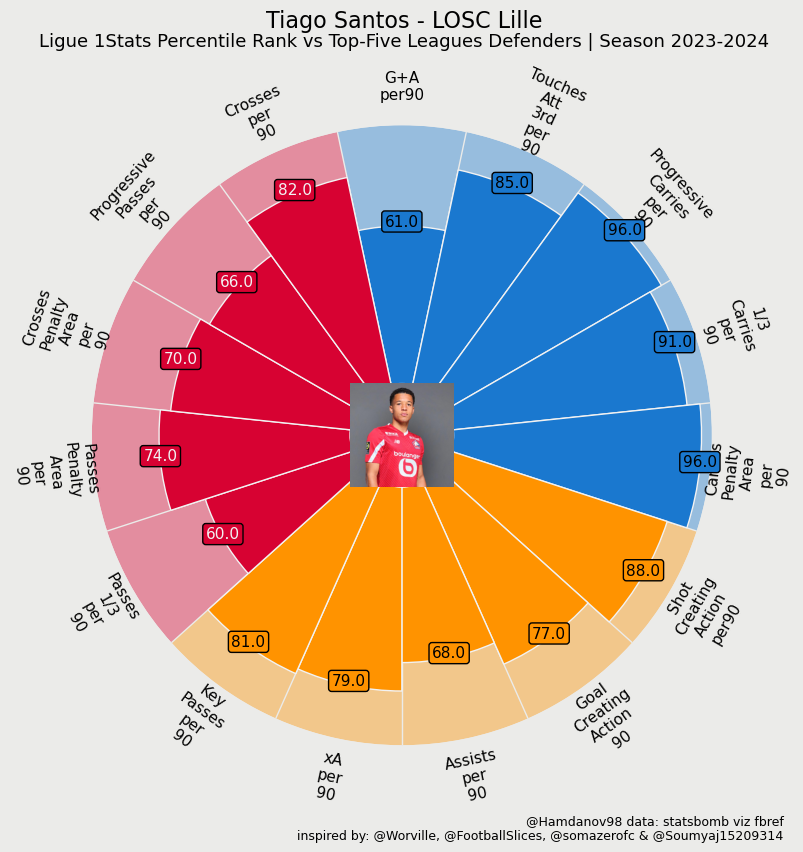

In [57]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params_2024, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    santos_2024_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Tiago Santos - LOSC Lille", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Ligue 1Stats Percentile Rank vs Top-Five Leagues Defenders | Season 2023-2024",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)





ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
plt.savefig('Cancelo_2024/Santos_2024_Percentile.png',dpi=500,bbox_inches = 'tight')  # save as png


In [58]:
image_path = "Traore.jpeg"
fdj_cropped = Image.open(image_path)


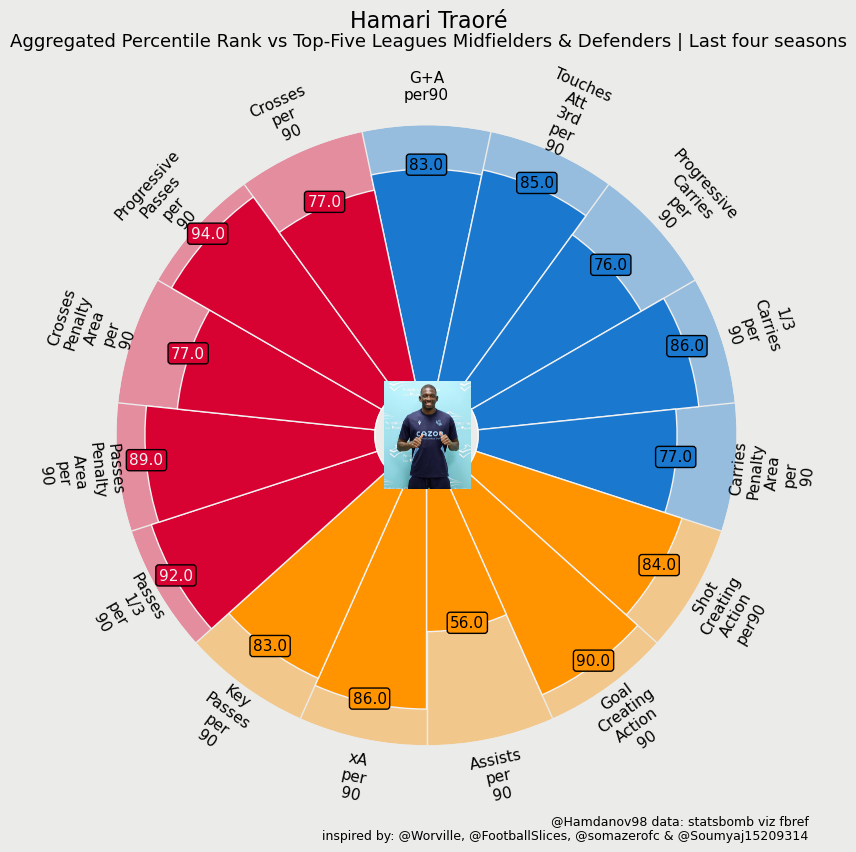

In [59]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    traore_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Hamari Traoré", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Aggregated Percentile Rank vs Top-Five Leagues Midfielders & Defenders | Last four seasons",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)





ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
plt.savefig('Cancelo/Traore_Percentile.png',dpi=500,bbox_inches = 'tight')  # save as png


In [60]:
image_path = "DiLorenzo.jpeg"
fdj_cropped = Image.open(image_path)


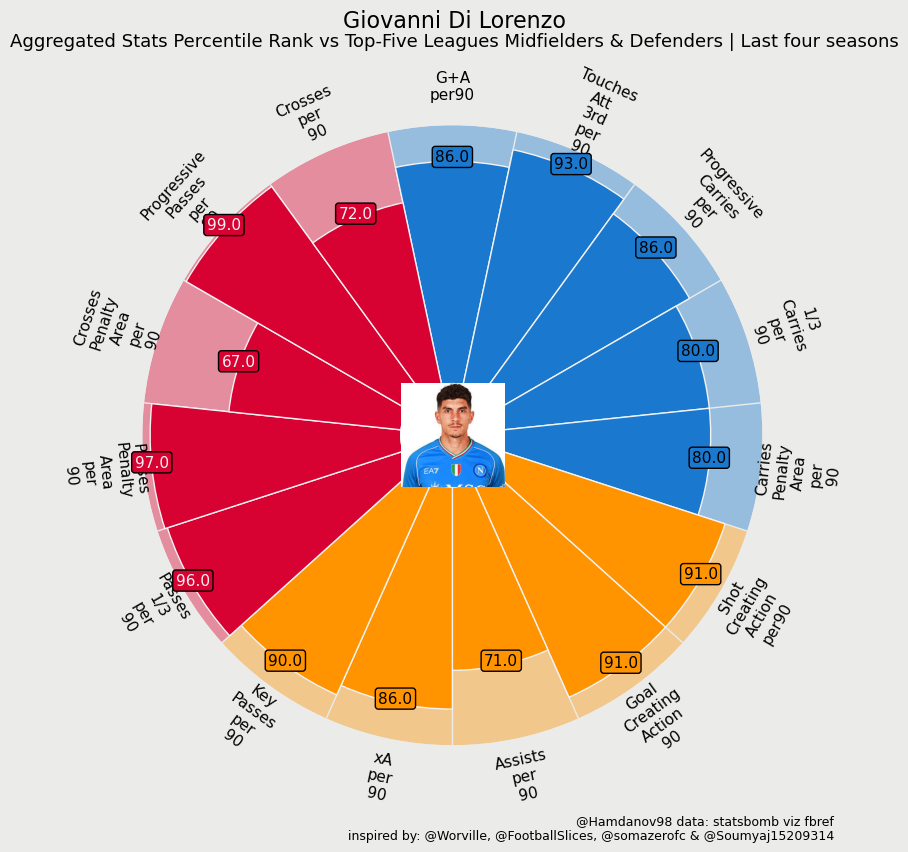

In [61]:
import matplotlib.pyplot as plt
from mplsoccer import PyPizza

slice_colors = ["#1A78CF"] * 5 + ["#FF9300"] * 5 + ["#D70232"] * 5
text_colors = ["#000000"] * 10 + ["#F2F2F2"] * 5

baker = PyPizza(
params=split_params, # list of parameters
background_color="#EBEBE9", # background color
straight_line_color="#EBEBE9", # color for straight lines
straight_line_lw=1, # linewidth for straight lines
last_circle_lw=0, # linewidth of last circle
other_circle_lw=0, # linewidth for other circles
inner_circle_size=20 # size of inner circle
)

fig, ax = baker.make_pizza(
    lorenzo_percentile_ranks_list,  # list of values
    figsize=(8, 8.5),  # adjust figsize according to your need
    color_blank_space="same",  # use same color to fill blank space
    slice_colors=slice_colors,  # color for individual slices
    value_colors=text_colors,  # color for the value-text
    value_bck_colors=slice_colors,  # color for the blank spaces
    blank_alpha=0.4,  # alpha for blank-space colors
    param_location=115,  # move param labels further out
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),  # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=11,
        va="center"  # ha is removed here
    ),  # values to be used when adding parameters
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )  # values to be used when adding parameter-values
)


fig.text(
0.515, 0.975, "Giovanni Di Lorenzo", size=16,
ha="center", color="#000000"
)


fig.text(
0.515, 0.953,
"Aggregated Stats Percentile Rank vs Top-Five Leagues Midfielders & Defenders | Last four seasons",
size=13,
ha="center", color="#000000"
)


CREDIT_1 = "@Hamdanov98 data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
color="#000000",
ha="right"
)





ax_image = add_image(
fdj_cropped, fig, left=0.4478, bottom=0.4315, width=0.13, height=0.127
) # these values might differ when you are plotting

#plt.show()
plt.savefig('Cancelo/DiLorenzo_Percentile.png',dpi=500,bbox_inches = 'tight')  # save as png
